#### Creo los datos con sus proporciones para cada rango horario

In [113]:
import numpy as np
import pandas as pd
import random
from datetime import datetime, timedelta

# Definición de la tabla de proporciones por día y horario
proportions = {
    # Fin de semana: ajuste de proporciones
    "Sunday": [7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 13.5, 13.0, 12.5, 11.0],
    "Saturday": [5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 11.0, 10.5, 10.0, 9.5, 9.0],
    
    # Días de semana: sin cambios
    "Monday":    [3.5, 1.5, 1.6, 1.4, 4.0, 6.0, 7.1, 8.0, 9.5, 12.4, 13.0, 11.5],
    "Tuesday":   [3.2, 1.4, 1.5, 1.6, 4.1, 6.1, 7.0, 8.1, 10.2, 12.3, 13.1, 11.4],
    "Wednesday": [3.8, 1.6, 1.4, 1.5, 4.2, 6.2, 7.2, 8.2, 11.0, 12.6, 13.2, 11.6],
    "Thursday":  [3.9, 1.5, 1.6, 1.5, 4.3, 6.3, 7.1, 8.3, 11.5, 12.7, 13.3, 11.7],
    "Friday":    [3.7, 1.4, 1.5, 1.6, 4.4, 6.4, 7.3, 8.4, 11.8, 12.8, 13.4, 11.8]
}

# Total de pacientes por día, variando según el día de la semana
patients_variation = {
    "Sunday": random.randint(150, 200),   # Más pacientes los domingos
    "Saturday": random.randint(80, 120),  # Menos pacientes los sábados
    "Monday": random.randint(130, 180),   # Más pacientes los lunes
    "Tuesday": random.randint(70, 100),   # Menos pacientes los martes
    "Wednesday": random.randint(70, 100), # Menos pacientes los miércoles
    "Thursday": random.randint(70, 100),  # Menos pacientes los jueves
    "Friday": random.randint(70, 100)     # Menos pacientes los viernes
}

# Crear una lista para almacenar los datos generados
data = []

# Fecha inicial y final (mes de julio)
start_date = datetime(2024, 7, 1)
end_date = datetime(2024, 7, 28)

# Generar datos para cada día
current_date = start_date
while current_date <= end_date:
    day_of_week = current_date.strftime("%A")
    total_patients_per_day = patients_variation[day_of_week]
    daily_proportions = proportions[day_of_week]
    
    # Calcular el número de pacientes por franja horaria según las proporciones
    hourly_patients = np.round(np.array(daily_proportions) / sum(daily_proportions) * total_patients_per_day).astype(int)
    
    # Generar datos para cada franja horaria
    for i, patients in enumerate(hourly_patients):
        hour_start = i * 2
        for _ in range(patients):
            random_minute = random.randint(0, 59)
            entry_time = current_date + timedelta(hours=hour_start, minutes=random_minute)
            patient_id = random.randint(1000, 9999)
            data.append([patient_id, entry_time.date(), entry_time.time(), day_of_week])
    
    # Avanzar al siguiente día
    current_date += timedelta(days=1)

# Convertir a DataFrame
df = pd.DataFrame(data, columns=["Patient ID", "Entry Date", "Entry Time", "Day of Week"])

# Asegurarse de que la columna "Entry Hour" esté en formato de horas
df['Entry Hour'] = pd.to_datetime(df['Entry Time'], format='%H:%M:%S', errors='coerce').dt.hour

# Crear una columna para los rangos de horas (0-1, 2-3, ..., 22-23)
df['Hour Range'] = pd.cut(df['Entry Hour'], bins=np.arange(0, 25, 2), right=False, labels=[f'{i}-{i+1}' for i in range(0, 24, 2)])

# Contar el número de pacientes por día de la semana y por rango de horas
patient_counts = df.groupby(['Day of Week', 'Hour Range']).size().unstack(fill_value=0)
print(patient_counts)


Hour Range   0-1  2-3  4-5  6-7  8-9  10-11  12-13  14-15  16-17  18-19  \
Day of Week                                                               
Friday        12    4    4    4   16     24     24     28     40     44   
Monday        28   12   12   12   32     48     56     60     72     96   
Saturday      24   28   28   32   32     36     40     52     52     48   
Sunday        36   36   40   44   44     48     48     52     68     64   
Thursday      12    4    4    4   16     24     24     28     40     44   
Tuesday       12    4    8    8   16     24     28     36     44     52   
Wednesday     12    4    4    4   16     24     28     28     40     44   

Hour Range   20-21  22-23  
Day of Week                
Friday          48     40  
Monday         100     88  
Saturday        44     44  
Sunday          64     56  
Thursday        48     40  
Tuesday         56     48  
Wednesday       48     44  


C:\Users\paula\AppData\Local\Temp\ipykernel_29964\4160617656.py:70: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  patient_counts = df.groupby(['Day of Week', 'Hour Range']).size().unstack(fill_value=0)


In [114]:
print(df)

      Patient ID  Entry Date Entry Time Day of Week  Entry Hour Hour Range
0           8835  2024-07-01   00:11:00      Monday           0        0-1
1           7884  2024-07-01   00:25:00      Monday           0        0-1
2           2599  2024-07-01   00:04:00      Monday           0        0-1
3           2177  2024-07-01   00:10:00      Monday           0        0-1
4           2932  2024-07-01   00:58:00      Monday           0        0-1
...          ...         ...        ...         ...         ...        ...
2879        4400  2024-07-28   22:21:00      Sunday          22      22-23
2880        6998  2024-07-28   22:23:00      Sunday          22      22-23
2881        4028  2024-07-28   22:09:00      Sunday          22      22-23
2882        6053  2024-07-28   22:04:00      Sunday          22      22-23
2883        4723  2024-07-28   22:55:00      Sunday          22      22-23

[2884 rows x 6 columns]


In [21]:
# Calcular el promedio de pacientes atendidos por día de la semana
average_patients_per_day = df.groupby('Day of Week').size() / df['Day of Week'].nunique()

# Convertir el resultado a un DataFrame para una mejor visualización
average_patients_df = average_patients_per_day.reset_index(name='Average Patients')

# Ordenar la tabla de forma descendente por el promedio de pacientes
average_patients_df = average_patients_df.sort_values(by='Average Patients', ascending=False)

# Mostrar la tabla resultante
print(average_patients_df)


  Day of Week  Average Patients
3      Sunday         94.285714
1      Monday         80.571429
2    Saturday         64.571429
0      Friday         53.714286
4    Thursday         52.000000
6   Wednesday         45.714286
5     Tuesday         40.571429


Número total de pacientes por día de la semana:
Day of Week
Monday       616
Tuesday      308
Wednesday    332
Thursday     288
Friday       280
Saturday     428
Sunday       664
Name: count, dtype: int64
Promedio de pacientes por día (Total de la semana): 416.57142857142856


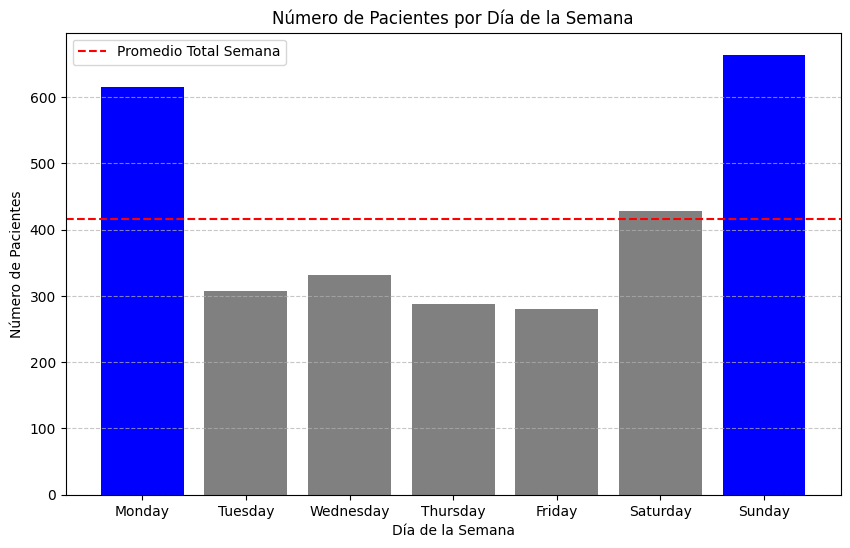

In [189]:
import matplotlib.pyplot as plt

# Calcular el número total de pacientes por cada día de la semana
patients_per_day = df['Day of Week'].value_counts().sort_index()

# Mostrar el número total de pacientes por día
print("Número total de pacientes por día de la semana:")
print(patients_per_day)

# Calcular el promedio de pacientes de todos los días de la semana
promedio_total_semana = patients_per_day.mean()

# Mostrar los promedios calculados
print(f"Promedio de pacientes por día (Total de la semana): {promedio_total_semana}")

# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.bar(patients_per_day.index, patients_per_day.values, color=['blue' if day in ['Sunday', 'Monday'] else 'gray' for day in patients_per_day.index])
plt.axhline(promedio_total_semana, color='red', linestyle='--', label='Promedio Total Semana')  # Línea roja para el promedio total
plt.title('Número de Pacientes por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Pacientes')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


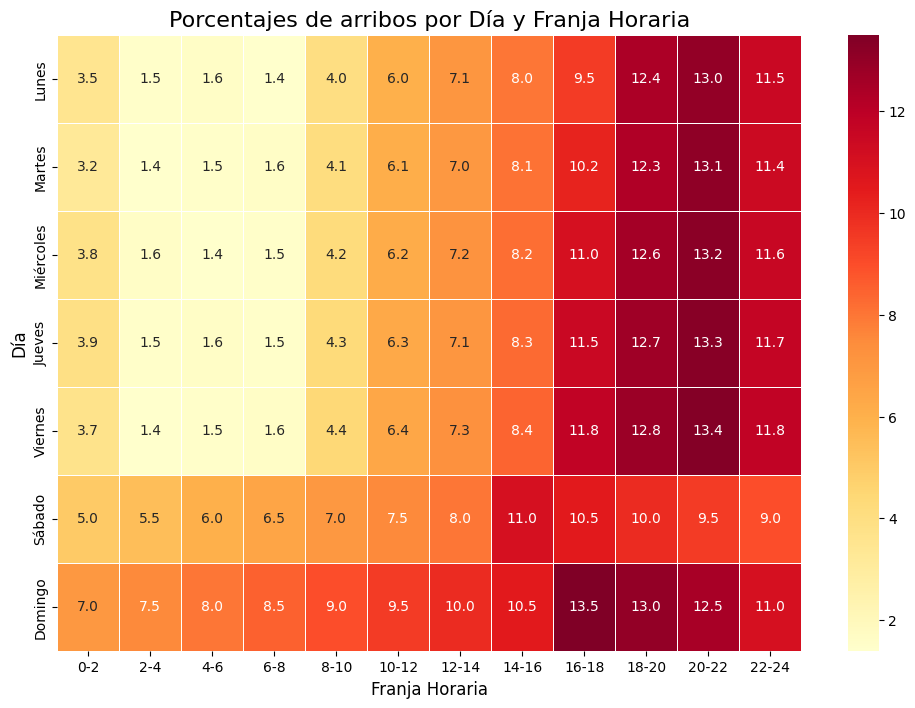

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Datos proporcionados
data = {
    'Día': ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'],
    '0-2': [3.5, 3.2, 3.8, 3.9, 3.7, 5.0, 7.0],
    '2-4': [1.5, 1.4, 1.6, 1.5, 1.4, 5.5, 7.5],
    '4-6': [1.6, 1.5, 1.4, 1.6, 1.5, 6.0, 8.0],
    '6-8': [1.4, 1.6, 1.5, 1.5, 1.6, 6.5, 8.5],
    '8-10': [4.0, 4.1, 4.2, 4.3, 4.4, 7.0, 9.0],
    '10-12': [6.0, 6.1, 6.2, 6.3, 6.4, 7.5, 9.5],
    '12-14': [7.1, 7.0, 7.2, 7.1, 7.3, 8.0, 10.0],
    '14-16': [8.0, 8.1, 8.2, 8.3, 8.4, 11.0, 10.5],
    '16-18': [9.5, 10.2, 11.0, 11.5, 11.8, 10.5, 13.5],
    '18-20': [12.4, 12.3, 12.6, 12.7, 12.8, 10.0, 13.0],
    '20-22': [13.0, 13.1, 13.2, 13.3, 13.4, 9.5, 12.5],
    '22-24': [11.5, 11.4, 11.6, 11.7, 11.8, 9.0, 11.0],
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Establecer 'Día' como índice
df.set_index('Día', inplace=True)

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, cmap="YlOrRd", fmt=".1f", linewidths=.5)

# Títulos
plt.title('Porcentajes de arribos por Día y Franja Horaria', fontsize=16)
plt.xlabel('Franja Horaria', fontsize=12)
plt.ylabel('Día', fontsize=12)

# Mostrar el heatmap
plt.show()


#### Grafico todos los días de semana para ver como se ven

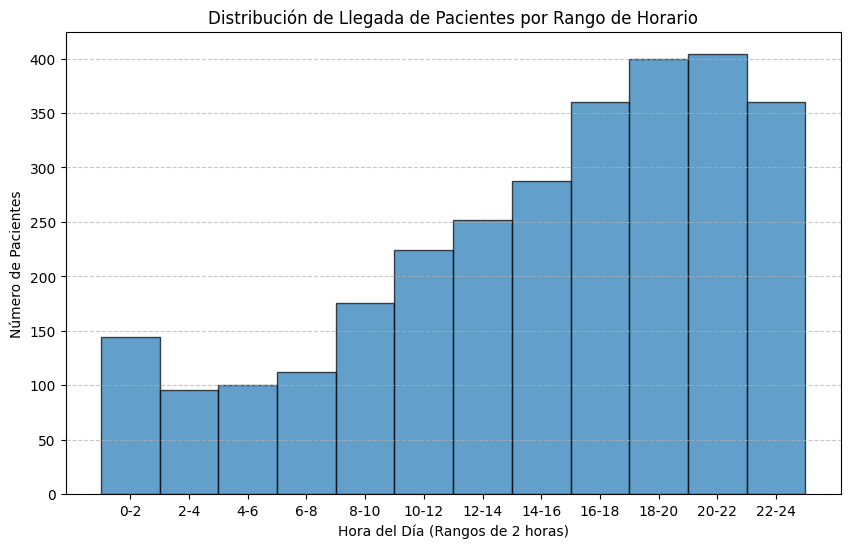

In [190]:
import matplotlib.pyplot as plt
import numpy as np

# Asegurarse de que la columna "Entry Hour" esté en formato de horas
df['Entry Hour'] = pd.to_datetime(df['Entry Time'], format='%H:%M:%S', errors='coerce').dt.hour

# Crear los bins y calcular los centros de los bins
bins = np.arange(0, 25, 2)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Crear el histograma con 12 bins para representar los 12 rangos de horarios del día
plt.figure(figsize=(10, 6))
plt.hist(df['Entry Hour'].dropna(), bins=bins, edgecolor='black', alpha=0.7)

# Configurar el gráfico
plt.title('Distribución de Llegada de Pacientes por Rango de Horario')
plt.xlabel('Hora del Día (Rangos de 2 horas)')
plt.ylabel('Número de Pacientes')
plt.xticks(bin_centers, labels=[f'{int(b)}-{int(b+2)}' for b in bins[:-1]])  # Ajustar las etiquetas para que estén en el centro de los bins
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


C:\Users\paula\AppData\Local\Temp\ipykernel_21580\2377661497.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monday_data['Entry Hour'] = pd.to_datetime(monday_data['Entry Time'], format='%H:%M:%S', errors='coerce').dt.hour


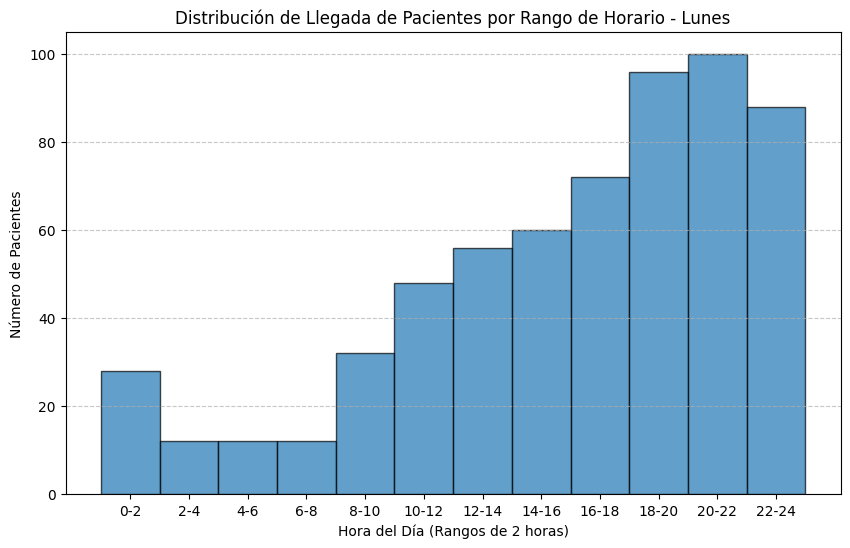

In [191]:
import matplotlib.pyplot as plt
import numpy as np

# Filtrar los datos para mostrar solo los registros de los lunes
monday_data = df[df['Day of Week'] == 'Monday']

# Asegurarse de que la columna "Entry Hour" esté en formato de horas
monday_data['Entry Hour'] = pd.to_datetime(monday_data['Entry Time'], format='%H:%M:%S', errors='coerce').dt.hour

# Crear los bins y calcular los centros de los bins
bins = np.arange(0, 25, 2)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Crear el histograma con 12 bins para representar los 12 rangos de horarios del día
plt.figure(figsize=(10, 6))
plt.hist(monday_data['Entry Hour'].dropna(), bins=bins, edgecolor='black', alpha=0.7)

# Configurar el gráfico
plt.title('Distribución de Llegada de Pacientes por Rango de Horario - Lunes')
plt.xlabel('Hora del Día (Rangos de 2 horas)')
plt.ylabel('Número de Pacientes')
plt.xticks(bin_centers, labels=[f'{int(b)}-{int(b+2)}' for b in bins[:-1]])  # Ajustar las etiquetas para que estén en el centro de los bins
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


C:\Users\paula\AppData\Local\Temp\ipykernel_21580\1029657870.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tuesday_data['Entry Hour'] = pd.to_datetime(tuesday_data['Entry Time'], format='%H:%M:%S', errors='coerce').dt.hour


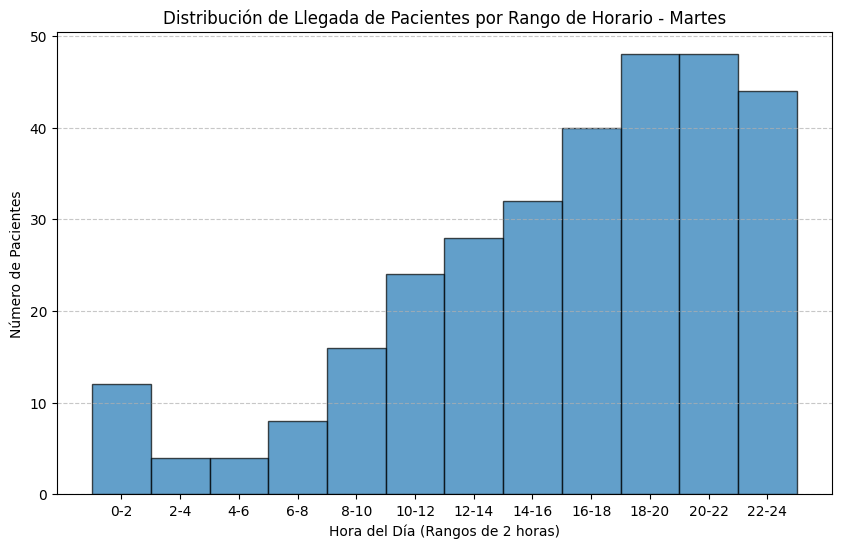

In [192]:
tuesday_data = df[df['Day of Week'] == 'Tuesday']

# Asegurarse de que la columna "Entry Hour" esté en formato de horas
tuesday_data['Entry Hour'] = pd.to_datetime(tuesday_data['Entry Time'], format='%H:%M:%S', errors='coerce').dt.hour

# Crear los bins y calcular los centros de los bins
bins = np.arange(0, 25, 2)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Crear el histograma con 12 bins para representar los 12 rangos de horarios del día
plt.figure(figsize=(10, 6))
plt.hist(tuesday_data['Entry Hour'].dropna(), bins=bins, edgecolor='black', alpha=0.7)

# Configurar el gráfico
plt.title('Distribución de Llegada de Pacientes por Rango de Horario - Martes')
plt.xlabel('Hora del Día (Rangos de 2 horas)')
plt.ylabel('Número de Pacientes')
plt.xticks(bin_centers, labels=[f'{int(b)}-{int(b+2)}' for b in bins[:-1]])  # Ajustar las etiquetas para que estén en el centro de los bins
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


C:\Users\paula\AppData\Local\Temp\ipykernel_21580\3829292422.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wednesday_data['Entry Hour'] = pd.to_datetime(wednesday_data['Entry Time'], format='%H:%M:%S', errors='coerce').dt.hour


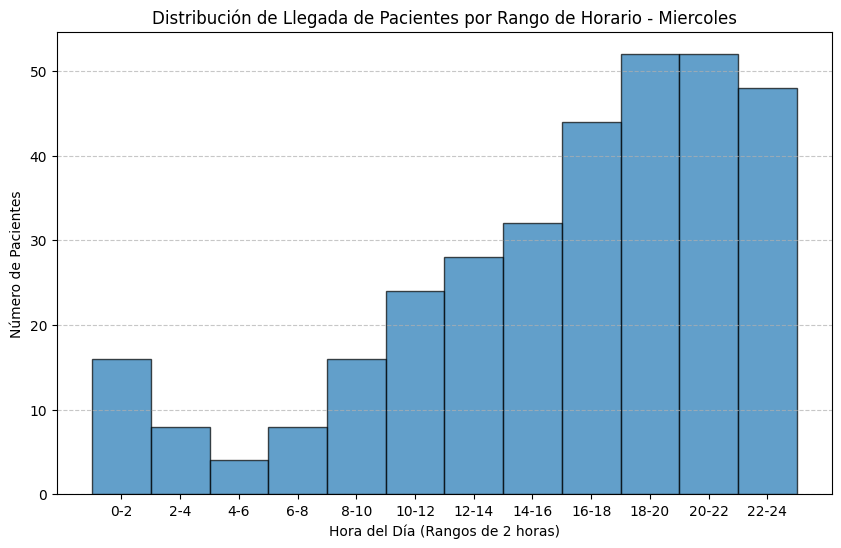

In [193]:
wednesday_data = df[df['Day of Week'] == 'Wednesday']

# Asegurarse de que la columna "Entry Hour" esté en formato de horas
wednesday_data['Entry Hour'] = pd.to_datetime(wednesday_data['Entry Time'], format='%H:%M:%S', errors='coerce').dt.hour

# Crear los bins y calcular los centros de los bins
bins = np.arange(0, 25, 2)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Crear el histograma con 12 bins para representar los 12 rangos de horarios del día
plt.figure(figsize=(10, 6))
plt.hist(wednesday_data['Entry Hour'].dropna(), bins=bins, edgecolor='black', alpha=0.7)

# Configurar el gráfico
plt.title('Distribución de Llegada de Pacientes por Rango de Horario - Miercoles')
plt.xlabel('Hora del Día (Rangos de 2 horas)')
plt.ylabel('Número de Pacientes')
plt.xticks(bin_centers, labels=[f'{int(b)}-{int(b+2)}' for b in bins[:-1]])  # Ajustar las etiquetas para que estén en el centro de los bins
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


C:\Users\paula\AppData\Local\Temp\ipykernel_21580\1088762204.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thursday_data['Entry Hour'] = pd.to_datetime(thursday_data['Entry Time'], format='%H:%M:%S', errors='coerce').dt.hour


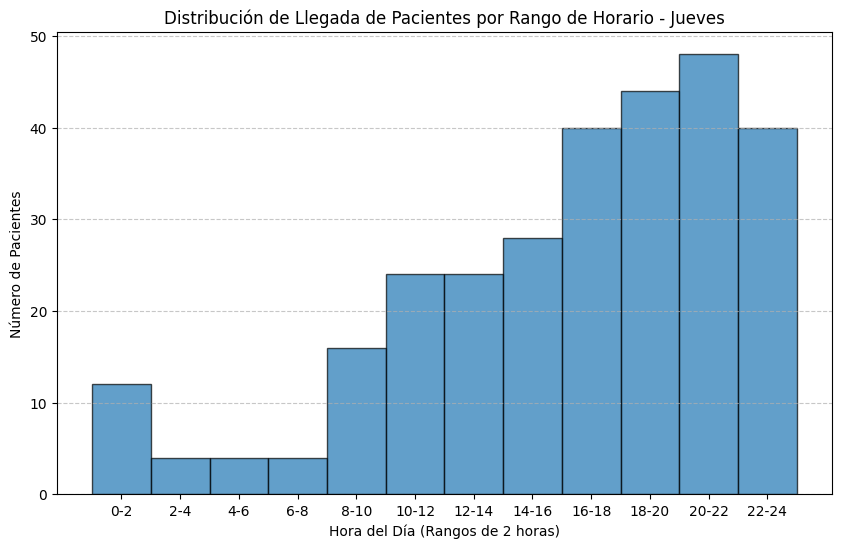

In [194]:
thursday_data = df[df['Day of Week'] == 'Thursday']

# Asegurarse de que la columna "Entry Hour" esté en formato de horas
thursday_data['Entry Hour'] = pd.to_datetime(thursday_data['Entry Time'], format='%H:%M:%S', errors='coerce').dt.hour

# Crear los bins y calcular los centros de los bins
bins = np.arange(0, 25, 2)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Crear el histograma con 12 bins para representar los 12 rangos de horarios del día
plt.figure(figsize=(10, 6))
plt.hist(thursday_data['Entry Hour'].dropna(), bins=bins, edgecolor='black', alpha=0.7)

# Configurar el gráfico
plt.title('Distribución de Llegada de Pacientes por Rango de Horario - Jueves')
plt.xlabel('Hora del Día (Rangos de 2 horas)')
plt.ylabel('Número de Pacientes')
plt.xticks(bin_centers, labels=[f'{int(b)}-{int(b+2)}' for b in bins[:-1]])  # Ajustar las etiquetas para que estén en el centro de los bins
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


C:\Users\paula\AppData\Local\Temp\ipykernel_21580\2723467375.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  friday_data['Entry Hour'] = pd.to_datetime(friday_data['Entry Time'], format='%H:%M:%S', errors='coerce').dt.hour


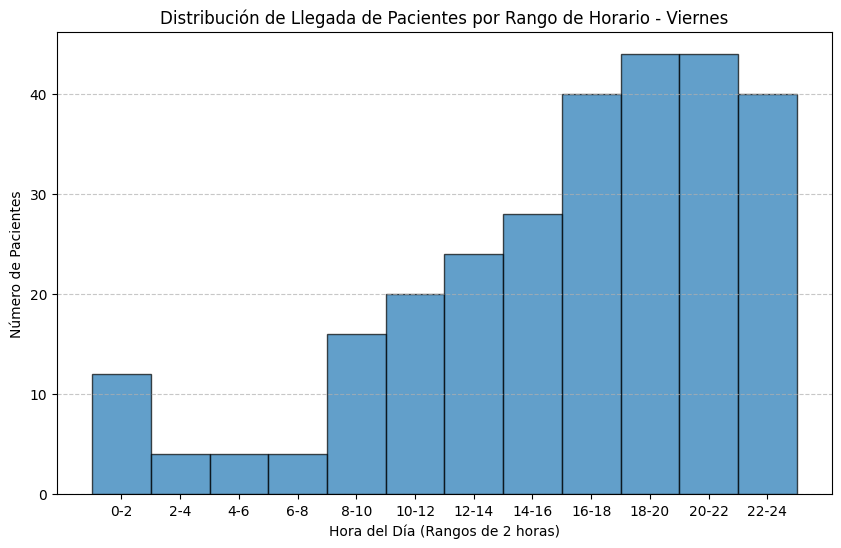

In [195]:
friday_data = df[df['Day of Week'] == 'Friday']

# Asegurarse de que la columna "Entry Hour" esté en formato de horas
friday_data['Entry Hour'] = pd.to_datetime(friday_data['Entry Time'], format='%H:%M:%S', errors='coerce').dt.hour

# Crear los bins y calcular los centros de los bins
bins = np.arange(0, 25, 2)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Crear el histograma con 12 bins para representar los 12 rangos de horarios del día
plt.figure(figsize=(10, 6))
plt.hist(friday_data['Entry Hour'].dropna(), bins=bins, edgecolor='black', alpha=0.7)

# Configurar el gráfico
plt.title('Distribución de Llegada de Pacientes por Rango de Horario - Viernes')
plt.xlabel('Hora del Día (Rangos de 2 horas)')
plt.ylabel('Número de Pacientes')
plt.xticks(bin_centers, labels=[f'{int(b)}-{int(b+2)}' for b in bins[:-1]])  # Ajustar las etiquetas para que estén en el centro de los bins
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

C:\Users\paula\AppData\Local\Temp\ipykernel_21580\404653770.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saturday_data['Entry Hour'] = pd.to_datetime(saturday_data['Entry Time'], format='%H:%M:%S', errors='coerce').dt.hour


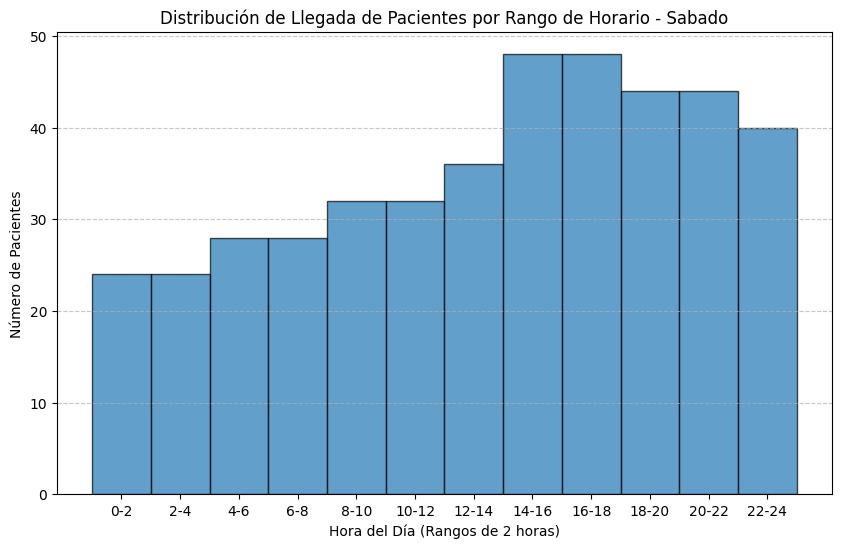

In [196]:
saturday_data = df[df['Day of Week'] == 'Saturday']

# Asegurarse de que la columna "Entry Hour" esté en formato de horas
saturday_data['Entry Hour'] = pd.to_datetime(saturday_data['Entry Time'], format='%H:%M:%S', errors='coerce').dt.hour

# Crear los bins y calcular los centros de los bins
bins = np.arange(0, 25, 2)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Crear el histograma con 12 bins para representar los 12 rangos de horarios del día
plt.figure(figsize=(10, 6))
plt.hist(saturday_data['Entry Hour'].dropna(), bins=bins, edgecolor='black', alpha=0.7)

# Configurar el gráfico
plt.title('Distribución de Llegada de Pacientes por Rango de Horario - Sabado')
plt.xlabel('Hora del Día (Rangos de 2 horas)')
plt.ylabel('Número de Pacientes')
plt.xticks(bin_centers, labels=[f'{int(b)}-{int(b+2)}' for b in bins[:-1]])  # Ajustar las etiquetas para que estén en el centro de los bins
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

C:\Users\paula\AppData\Local\Temp\ipykernel_21580\619432946.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sunday_data['Entry Hour'] = pd.to_datetime(sunday_data['Entry Time'], format='%H:%M:%S', errors='coerce').dt.hour


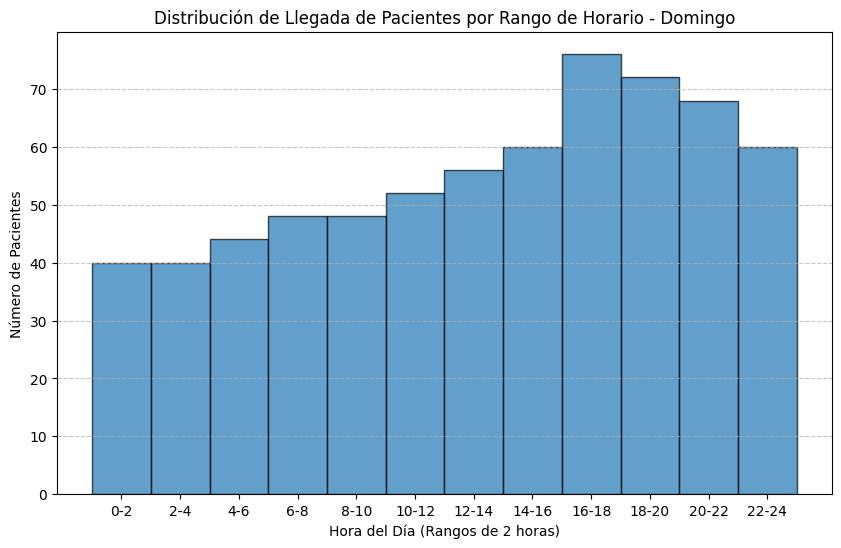

In [197]:
sunday_data = df[df['Day of Week'] == 'Sunday']

# Asegurarse de que la columna "Entry Hour" esté en formato de horas
sunday_data['Entry Hour'] = pd.to_datetime(sunday_data['Entry Time'], format='%H:%M:%S', errors='coerce').dt.hour

# Crear los bins y calcular los centros de los bins
bins = np.arange(0, 25, 2)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Crear el histograma con 12 bins para representar los 12 rangos de horarios del día
plt.figure(figsize=(10, 6))
plt.hist(sunday_data['Entry Hour'].dropna(), bins=bins, edgecolor='black', alpha=0.7)

# Configurar el gráfico
plt.title('Distribución de Llegada de Pacientes por Rango de Horario - Domingo')
plt.xlabel('Hora del Día (Rangos de 2 horas)')
plt.ylabel('Número de Pacientes')
plt.xticks(bin_centers, labels=[f'{int(b)}-{int(b+2)}' for b in bins[:-1]])  # Ajustar las etiquetas para que estén en el centro de los bins
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

In [200]:
# Filtrar los datos para días de semana (Monday a Friday)
weekday_data = df[df['Day of Week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

# Filtrar los datos para fines de semana (Saturday y Sunday)
weekend_data = df[df['Day of Week'].isin(['Saturday', 'Sunday'])]

# Contar el número de días únicos en cada grupo
num_weekdays = weekday_data['Entry Date'].nunique()
num_weekend_days = weekend_data['Entry Date'].nunique()

# Calcular el promedio de pacientes por día en cada grupo
weekday_avg = len(weekday_data) / num_weekdays if num_weekdays > 0 else 0
weekend_avg = len(weekend_data) / num_weekend_days if num_weekend_days > 0 else 0

# Mostrar los resultados
print(f'Promedio de pacientes por día - Días de semana: {weekday_avg}')
print(f'Promedio de pacientes por día - Fines de semana: {weekend_avg}')

Promedio de pacientes por día - Días de semana: 91.2
Promedio de pacientes por día - Fines de semana: 136.5


#### Encuentro la distribución para los tiempos entre arribos

##### Los sabados  

C:\Users\paula\AppData\Local\Temp\ipykernel_29964\3499343486.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_saturday['Entry Time'] = pd.to_datetime(df_saturday['Entry Time'], format='%H:%M:%S')


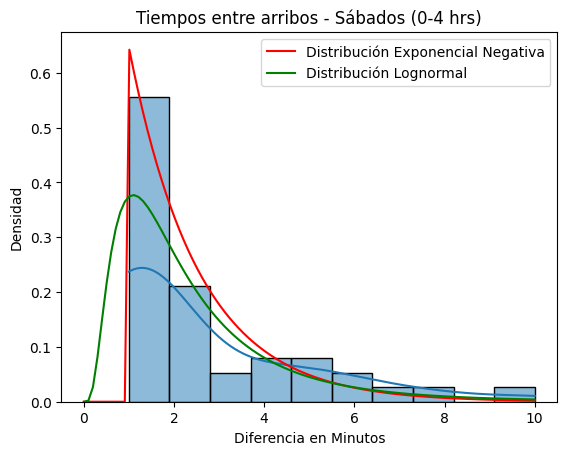

KS Test Statistic (Exponencial): 0.5
P-Value (Exponencial): 3.1059139575655383e-10
Parámetros de la distribución exponencial: loc=1.0, scale=1.5476190476190474
Se rechaza la hipótesis nula: Los datos no siguen una distribución exponencial negativa.
KS Test Statistic (Lognormal): 0.3057296643982469
P-Value (Lognormal): 0.000555529987655845
Parámetros de la distribución lognormal: shape=0.735631663644279, loc=0, scale=1.8857220971720738
Se rechaza la hipótesis nula: Los datos no siguen una distribución lognormal.


In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import expon, lognorm, kstest
import numpy as np

# Filtrar los datos para el sábado entre las 0 y las 4 horas
df_saturday = df[(df['Day of Week'] == 'Saturday') & (df['Entry Hour'] < 4)] 

# Convertir la columna 'Entry Time' a formato datetime, considerando solo la hora
df_saturday['Entry Time'] = pd.to_datetime(df_saturday['Entry Time'], format='%H:%M:%S')

# Ordenar los tiempos
df_saturday_sorted = df_saturday.sort_values(by='Entry Time')

# Calcular la diferencia en minutos entre cada tiempo
df_saturday_sorted['Minutes Difference'] = df_saturday_sorted['Entry Time'].diff().dt.total_seconds() / 60

# Eliminar los valores NaN de la columna 'Minutes Difference'
minutes_diff = df_saturday_sorted['Minutes Difference'].dropna()

# Filtrar los valores que sean mayores a 50 en la columna 'Minutes Difference'
minutes_diff = minutes_diff[minutes_diff <= 50]

# Eliminar los valores iguales a 0
minutes_diff = minutes_diff[minutes_diff > 0]

# Crear el histograma con la curva de densidad
sns.histplot(minutes_diff, bins=10, kde=True, stat="density", edgecolor='black')

# Ajustar una distribución exponencial a los datos
params_expon = expon.fit(minutes_diff)
x = np.linspace(0, max(minutes_diff), 100)
pdf_expon = expon.pdf(x, *params_expon)

# Graficar la distribución exponencial negativa ajustada
plt.plot(x, pdf_expon, 'r-', label='Distribución Exponencial Negativa')

# Ajustar una distribución lognormal a los datos
params_lognorm = lognorm.fit(minutes_diff, floc=0)
pdf_lognorm = lognorm.pdf(x, *params_lognorm)

# Graficar la distribución lognormal ajustada
plt.plot(x, pdf_lognorm, 'g-', label='Distribución Lognormal')

# Agregar título y etiquetas
plt.title('Tiempos entre arribos - Sábados (0-4 hrs)')
plt.xlabel('Diferencia en Minutos')
plt.ylabel('Densidad')

# Mostrar leyenda
plt.legend()

# Mostrar el histograma y las curvas de densidad
plt.show()

# Realizar el test de Kolmogorov-Smirnov para comparar la distribución observada con la exponencial
ks_stat_expon, p_value_expon = kstest(minutes_diff, 'expon', args=params_expon)

# Realizar el test de Kolmogorov-Smirnov para comparar la distribución observada con la lognormal
ks_stat_lognorm, p_value_lognorm = kstest(minutes_diff, 'lognorm', args=params_lognorm)

# Mostrar los resultados del test de hipótesis para la exponencial
print(f"KS Test Statistic (Exponencial): {ks_stat_expon}")
print(f"P-Value (Exponencial): {p_value_expon}")
print(f"Parámetros de la distribución exponencial: loc={params_expon[0]}, scale={params_expon[1]}")

if p_value_expon > 0.05:
    print("No se puede rechazar la hipótesis nula: Los datos siguen una distribución exponencial negativa.")
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución exponencial negativa.")

# Mostrar los resultados del test de hipótesis para la lognormal
print(f"KS Test Statistic (Lognormal): {ks_stat_lognorm}")
print(f"P-Value (Lognormal): {p_value_lognorm}")
print(f"Parámetros de la distribución lognormal: shape={params_lognorm[0]}, loc={params_lognorm[1]}, scale={params_lognorm[2]}")

if p_value_lognorm > 0.05:
    print("No se puede rechazar la hipótesis nula: Los datos siguen una distribución lognormal.")
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución lognormal.")


C:\Users\paula\AppData\Local\Temp\ipykernel_29964\141910749.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_saturday['Entry Time'] = pd.to_datetime(df_saturday['Entry Time'], format='%H:%M:%S')


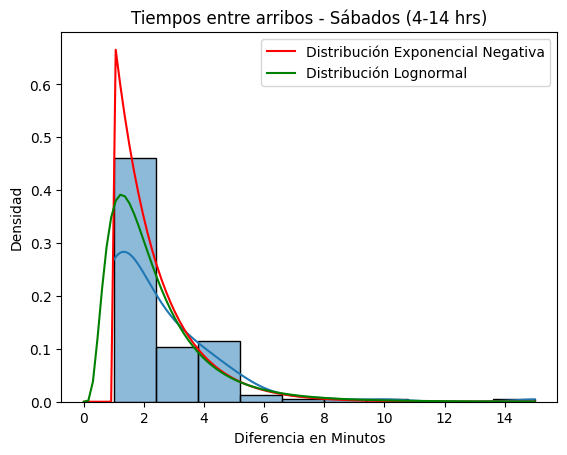

KS Test Statistic (Exponencial): 0.423728813559322
P-Value (Exponencial): 9.83832878787898e-20
Parámetros de la distribución exponencial: loc=1.0, scale=1.440677966101695
Se rechaza la hipótesis nula: Los datos no siguen una distribución exponencial negativa.
KS Test Statistic (Lognormal): 0.2643438177852996
P-Value (Lognormal): 9.106560656572076e-08
Parámetros de la distribución lognormal: shape=0.656377725736495, loc=0, scale=1.9239900487218478
Se rechaza la hipótesis nula: Los datos no siguen una distribución lognormal.


In [102]:
#Sábado entre las 4 y las 16 horas
df_saturday = df[(df['Day of Week'] == 'Saturday') & (df['Entry Hour'] >= 4) & (df['Entry Hour'] < 14)]

# Convertir la columna 'Entry Time' a formato datetime, considerando solo la hora
df_saturday['Entry Time'] = pd.to_datetime(df_saturday['Entry Time'], format='%H:%M:%S')

# Ordenar los tiempos
df_saturday_sorted = df_saturday.sort_values(by='Entry Time')

# Calcular la diferencia en minutos entre cada tiempo
df_saturday_sorted['Minutes Difference'] = df_saturday_sorted['Entry Time'].diff().dt.total_seconds() / 60

# Eliminar los valores NaN de la columna 'Minutes Difference'
minutes_diff = df_saturday_sorted['Minutes Difference'].dropna()

# Filtrar los valores que sean mayores a 50 en la columna 'Minutes Difference'
minutes_diff = minutes_diff[minutes_diff <= 50]

# Eliminar los valores iguales a 0
minutes_diff = minutes_diff[minutes_diff > 0]

# Crear el histograma con la curva de densidad
sns.histplot(minutes_diff, bins=10, kde=True, stat="density", edgecolor='black')

# Ajustar una distribución exponencial a los datos
params_expon = expon.fit(minutes_diff)
x = np.linspace(0, max(minutes_diff), 100)
pdf_expon = expon.pdf(x, *params_expon)

# Graficar la distribución exponencial negativa ajustada
plt.plot(x, pdf_expon, 'r-', label='Distribución Exponencial Negativa')

# Ajustar una distribución lognormal a los datos
params_lognorm = lognorm.fit(minutes_diff, floc=0)
pdf_lognorm = lognorm.pdf(x, *params_lognorm)

# Graficar la distribución lognormal ajustada
plt.plot(x, pdf_lognorm, 'g-', label='Distribución Lognormal')

# Agregar título y etiquetas
plt.title('Tiempos entre arribos - Sábados (4-14 hrs)')
plt.xlabel('Diferencia en Minutos')
plt.ylabel('Densidad')

# Mostrar leyenda
plt.legend()

# Mostrar el histograma y las curvas de densidad
plt.show()

# Realizar el test de Kolmogorov-Smirnov para comparar la distribución observada con la exponencial
ks_stat_expon, p_value_expon = kstest(minutes_diff, 'expon', args=params_expon)

# Realizar el test de Kolmogorov-Smirnov para comparar la distribución observada con la lognormal
ks_stat_lognorm, p_value_lognorm = kstest(minutes_diff, 'lognorm', args=params_lognorm)

# Mostrar los resultados del test de hipótesis para la exponencial
print(f"KS Test Statistic (Exponencial): {ks_stat_expon}")
print(f"P-Value (Exponencial): {p_value_expon}")
print(f"Parámetros de la distribución exponencial: loc={params_expon[0]}, scale={params_expon[1]}")

if p_value_expon > 0.05:
    print("No se puede rechazar la hipótesis nula: Los datos siguen una distribución exponencial negativa.")
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución exponencial negativa.")

# Mostrar los resultados del test de hipótesis para la lognormal
print(f"KS Test Statistic (Lognormal): {ks_stat_lognorm}")
print(f"P-Value (Lognormal): {p_value_lognorm}")
print(f"Parámetros de la distribución lognormal: shape={params_lognorm[0]}, loc={params_lognorm[1]}, scale={params_lognorm[2]}")

if p_value_lognorm > 0.05:
    print("No se puede rechazar la hipótesis nula: Los datos siguen una distribución lognormal.")
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución lognormal.")

C:\Users\paula\AppData\Local\Temp\ipykernel_29964\345463877.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_saturday['Entry Time'] = pd.to_datetime(df_saturday['Entry Time'], format='%H:%M:%S')


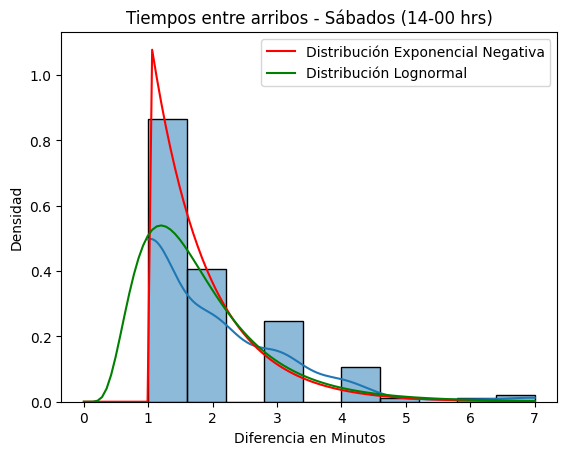

KS Test Statistic (Exponencial): 0.5192307692307693
P-Value (Exponencial): 1.2275267382972549e-39
Parámetros de la distribución exponencial: loc=1.0, scale=0.8653846153846154
Se rechaza la hipótesis nula: Los datos no siguen una distribución exponencial negativa.
KS Test Statistic (Lognormal): 0.32753329427409766
P-Value (Lognormal): 2.093962580425698e-15
Parámetros de la distribución lognormal: shape=0.5351107204818384, loc=0, scale=1.5942980880302455
Se rechaza la hipótesis nula: Los datos no siguen una distribución lognormal.


In [103]:
# Filtrar los datos para el sábado entre las 16 y las 00 horas
df_saturday = df[(df['Day of Week'] == 'Saturday') & (df['Entry Hour'] >= 14) & (df['Entry Hour'] < 24)]

# Convertir la columna 'Entry Time' a formato datetime, considerando solo la hora
df_saturday['Entry Time'] = pd.to_datetime(df_saturday['Entry Time'], format='%H:%M:%S')

# Ordenar los tiempos
df_saturday_sorted = df_saturday.sort_values(by='Entry Time')

# Calcular la diferencia en minutos entre cada tiempo
df_saturday_sorted['Minutes Difference'] = df_saturday_sorted['Entry Time'].diff().dt.total_seconds() / 60

# Eliminar los valores NaN de la columna 'Minutes Difference'
minutes_diff = df_saturday_sorted['Minutes Difference'].dropna()

# Filtrar los valores que sean mayores a 50 en la columna 'Minutes Difference'
minutes_diff = minutes_diff[minutes_diff <= 50]

# Eliminar los valores iguales a 0
minutes_diff = minutes_diff[minutes_diff > 0]

# Crear el histograma con la curva de densidad
sns.histplot(minutes_diff, bins=10, kde=True, stat="density", edgecolor='black')

# Ajustar una distribución exponencial a los datos
params_expon = expon.fit(minutes_diff)
x = np.linspace(0, max(minutes_diff), 100)
pdf_expon = expon.pdf(x, *params_expon)

# Graficar la distribución exponencial negativa ajustada
plt.plot(x, pdf_expon, 'r-', label='Distribución Exponencial Negativa')

# Ajustar una distribución lognormal a los datos
params_lognorm = lognorm.fit(minutes_diff, floc=0)
pdf_lognorm = lognorm.pdf(x, *params_lognorm)

# Graficar la distribución lognormal ajustada
plt.plot(x, pdf_lognorm, 'g-', label='Distribución Lognormal')

# Agregar título y etiquetas
plt.title('Tiempos entre arribos - Sábados (14-00 hrs)')
plt.xlabel('Diferencia en Minutos')
plt.ylabel('Densidad')

# Mostrar leyenda
plt.legend()

# Mostrar el histograma y las curvas de densidad
plt.show()

# Realizar el test de Kolmogorov-Smirnov para comparar la distribución observada con la exponencial
ks_stat_expon, p_value_expon = kstest(minutes_diff, 'expon', args=params_expon)

# Realizar el test de Kolmogorov-Smirnov para comparar la distribución observada con la lognormal
ks_stat_lognorm, p_value_lognorm = kstest(minutes_diff, 'lognorm', args=params_lognorm)

# Mostrar los resultados del test de hipótesis para la exponencial
print(f"KS Test Statistic (Exponencial): {ks_stat_expon}")
print(f"P-Value (Exponencial): {p_value_expon}")
print(f"Parámetros de la distribución exponencial: loc={params_expon[0]}, scale={params_expon[1]}")

if p_value_expon > 0.05:
    print("No se puede rechazar la hipótesis nula: Los datos siguen una distribución exponencial negativa.")
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución exponencial negativa.")

# Mostrar los resultados del test de hipótesis para la lognormal
print(f"KS Test Statistic (Lognormal): {ks_stat_lognorm}")
print(f"P-Value (Lognormal): {p_value_lognorm}")
print(f"Parámetros de la distribución lognormal: shape={params_lognorm[0]}, loc={params_lognorm[1]}, scale={params_lognorm[2]}")

if p_value_lognorm > 0.05:
    print("No se puede rechazar la hipótesis nula: Los datos siguen una distribución lognormal.")
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución lognormal.")


##### Lunes

C:\Users\paula\AppData\Local\Temp\ipykernel_29964\1038180841.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monday['Entry Time'] = pd.to_datetime(df_monday['Entry Time'], format='%H:%M:%S')


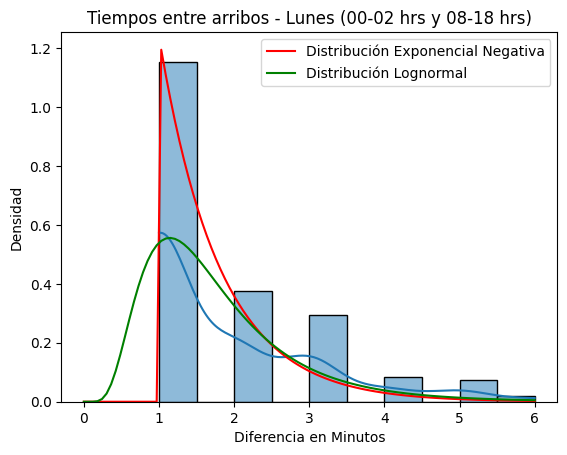

KS Test Statistic (Exponencial): 0.5759162303664922
P-Value (Exponencial): 1.4701026591903507e-60
Parámetros de la distribución exponencial: loc=1.0, scale=0.8062827225130891
Se rechaza la hipótesis nula: Los datos no siguen una distribución exponencial negativa.
KS Test Statistic (Lognormal): 0.3607885872171117
P-Value (Lognormal): 8.95456218791809e-23
Parámetros de la distribución lognormal: shape=0.5420059691956056, loc=0, scale=1.5334342875129852
Se rechaza la hipótesis nula: Los datos no siguen una distribución lognormal.


In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import expon, lognorm, kstest
import numpy as np

# Filtrar los datos para los lunes entre las 0-2 horas y 8-18 horas
df_monday = df[(df['Day of Week'] == 'Monday') & 
               ((df['Entry Hour'] >= 0) & (df['Entry Hour'] < 2) | 
                (df['Entry Hour'] >= 8) & (df['Entry Hour'] < 18))]

# Convertir la columna 'Entry Time' a formato datetime, considerando solo la hora
df_monday['Entry Time'] = pd.to_datetime(df_monday['Entry Time'], format='%H:%M:%S')

# Ordenar los tiempos
df_monday_sorted = df_monday.sort_values(by='Entry Time')

# Calcular la diferencia en minutos entre cada tiempo
df_monday_sorted['Minutes Difference'] = df_monday_sorted['Entry Time'].diff().dt.total_seconds() / 60

# Eliminar los valores NaN de la columna 'Minutes Difference'
minutes_diff = df_monday_sorted['Minutes Difference'].dropna()

# Filtrar los valores que sean mayores a 50 en la columna 'Minutes Difference'
minutes_diff = minutes_diff[minutes_diff <= 50]

# Eliminar los valores iguales a 0
minutes_diff = minutes_diff[minutes_diff > 0]

# Crear el histograma con la curva de densidad
sns.histplot(minutes_diff, bins=10, kde=True, stat="density", edgecolor='black')

# Ajustar una distribución exponencial a los datos
params_expon = expon.fit(minutes_diff)
x = np.linspace(0, max(minutes_diff), 100)
pdf_expon = expon.pdf(x, *params_expon)

# Graficar la distribución exponencial negativa ajustada
plt.plot(x, pdf_expon, 'r-', label='Distribución Exponencial Negativa')

# Ajustar una distribución lognormal a los datos
params_lognorm = lognorm.fit(minutes_diff, floc=0)
pdf_lognorm = lognorm.pdf(x, *params_lognorm)

# Graficar la distribución lognormal ajustada
plt.plot(x, pdf_lognorm, 'g-', label='Distribución Lognormal')

# Agregar título y etiquetas
plt.title('Tiempos entre arribos - Lunes (00-02 hrs y 08-18 hrs)')
plt.xlabel('Diferencia en Minutos')
plt.ylabel('Densidad')

# Mostrar leyenda
plt.legend()

# Mostrar el histograma y las curvas de densidad
plt.show()

# Realizar el test de Kolmogorov-Smirnov para comparar la distribución observada con la exponencial
ks_stat_expon, p_value_expon = kstest(minutes_diff, 'expon', args=params_expon)

# Realizar el test de Kolmogorov-Smirnov para comparar la distribución observada con la lognormal
ks_stat_lognorm, p_value_lognorm = kstest(minutes_diff, 'lognorm', args=params_lognorm)

# Mostrar los resultados del test de hipótesis para la exponencial
print(f"KS Test Statistic (Exponencial): {ks_stat_expon}")
print(f"P-Value (Exponencial): {p_value_expon}")
print(f"Parámetros de la distribución exponencial: loc={params_expon[0]}, scale={params_expon[1]}")

if p_value_expon > 0.05:
    print("No se puede rechazar la hipótesis nula: Los datos siguen una distribución exponencial negativa.")
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución exponencial negativa.")

# Mostrar los resultados del test de hipótesis para la lognormal
print(f"KS Test Statistic (Lognormal): {ks_stat_lognorm}")
print(f"P-Value (Lognormal): {p_value_lognorm}")
print(f"Parámetros de la distribución lognormal: shape={params_lognorm[0]}, loc={params_lognorm[1]}, scale={params_lognorm[2]}")

if p_value_lognorm > 0.05:
    print("No se puede rechazar la hipótesis nula: Los datos siguen una distribución lognormal.")
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución lognormal.")


C:\Users\paula\AppData\Local\Temp\ipykernel_29964\2051244716.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monday['Entry Time'] = pd.to_datetime(df_monday['Entry Time'], format='%H:%M:%S')


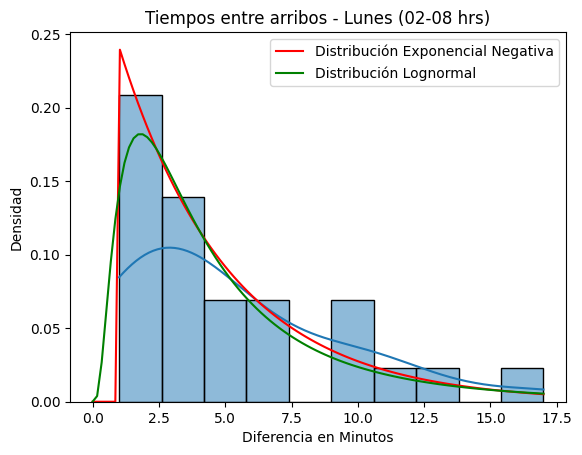

KS Test Statistic (Exponencial): 0.18518518518518517
P-Value (Exponencial): 0.2769118844850528
Parámetros de la distribución exponencial: loc=1.0, scale=4.148148148148148
No se puede rechazar la hipótesis nula: Los datos siguen una distribución exponencial negativa.
KS Test Statistic (Lognormal): 0.12389402276941489
P-Value (Lognormal): 0.7561870957781979
Parámetros de la distribución lognormal: shape=0.8476560959521325, loc=0, scale=3.701736499893801
No se puede rechazar la hipótesis nula: Los datos siguen una distribución lognormal.


In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import expon, lognorm, kstest
import numpy as np

# Filtrar los datos para los lunes entre las 2 y las 8 horas
df_monday = df[(df['Day of Week'] == 'Monday') & (df['Entry Hour'] >= 2) & (df['Entry Hour'] < 8)]

# Convertir la columna 'Entry Time' a formato datetime, considerando solo la hora
df_monday['Entry Time'] = pd.to_datetime(df_monday['Entry Time'], format='%H:%M:%S')

# Ordenar los tiempos
df_monday_sorted = df_monday.sort_values(by='Entry Time')

# Calcular la diferencia en minutos entre cada tiempo
df_monday_sorted['Minutes Difference'] = df_monday_sorted['Entry Time'].diff().dt.total_seconds() / 60

# Eliminar los valores NaN de la columna 'Minutes Difference'
minutes_diff = df_monday_sorted['Minutes Difference'].dropna()

# Filtrar los valores que sean mayores a 50 en la columna 'Minutes Difference'
minutes_diff = minutes_diff[minutes_diff <= 50]

# Eliminar los valores iguales a 0
minutes_diff = minutes_diff[minutes_diff > 0]

# Crear el histograma con la curva de densidad
sns.histplot(minutes_diff, bins=10, kde=True, stat="density", edgecolor='black')

# Ajustar una distribución exponencial a los datos
params_expon = expon.fit(minutes_diff)
x = np.linspace(0, max(minutes_diff), 100)
pdf_expon = expon.pdf(x, *params_expon)

# Graficar la distribución exponencial negativa ajustada
plt.plot(x, pdf_expon, 'r-', label='Distribución Exponencial Negativa')

# Ajustar una distribución lognormal a los datos
params_lognorm = lognorm.fit(minutes_diff, floc=0)
pdf_lognorm = lognorm.pdf(x, *params_lognorm)

# Graficar la distribución lognormal ajustada
plt.plot(x, pdf_lognorm, 'g-', label='Distribución Lognormal')

# Agregar título y etiquetas
plt.title('Tiempos entre arribos - Lunes (02-08 hrs)')
plt.xlabel('Diferencia en Minutos')
plt.ylabel('Densidad')

# Mostrar leyenda
plt.legend()

# Mostrar el histograma y las curvas de densidad
plt.show()

# Realizar el test de Kolmogorov-Smirnov para comparar la distribución observada con la exponencial
ks_stat_expon, p_value_expon = kstest(minutes_diff, 'expon', args=params_expon)

# Realizar el test de Kolmogorov-Smirnov para comparar la distribución observada con la lognormal
ks_stat_lognorm, p_value_lognorm = kstest(minutes_diff, 'lognorm', args=params_lognorm)

# Mostrar los resultados del test de hipótesis para la exponencial
print(f"KS Test Statistic (Exponencial): {ks_stat_expon}")
print(f"P-Value (Exponencial): {p_value_expon}")
print(f"Parámetros de la distribución exponencial: loc={params_expon[0]}, scale={params_expon[1]}")

if p_value_expon > 0.05:
    print("No se puede rechazar la hipótesis nula: Los datos siguen una distribución exponencial negativa.")
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución exponencial negativa.")

# Mostrar los resultados del test de hipótesis para la lognormal
print(f"KS Test Statistic (Lognormal): {ks_stat_lognorm}")
print(f"P-Value (Lognormal): {p_value_lognorm}")
print(f"Parámetros de la distribución lognormal: shape={params_lognorm[0]}, loc={params_lognorm[1]}, scale={params_lognorm[2]}")

if p_value_lognorm > 0.05:
    print("No se puede rechazar la hipótesis nula: Los datos siguen una distribución lognormal.")
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución lognormal.")


C:\Users\paula\AppData\Local\Temp\ipykernel_29964\40870738.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monday['Entry Time'] = pd.to_datetime(df_monday['Entry Time'], format='%H:%M:%S')


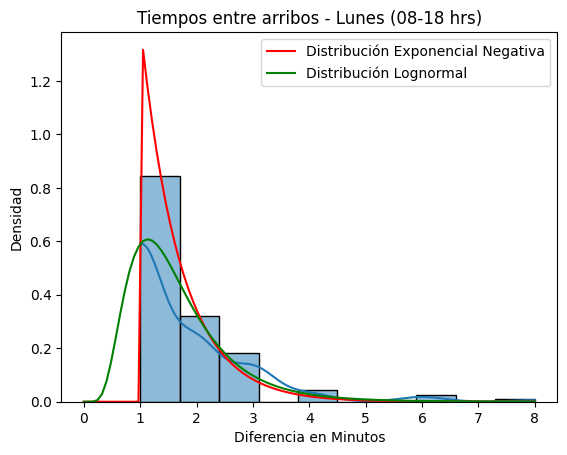

KS Test Statistic (Exponencial): 0.5914634146341463
P-Value (Exponencial): 3.2868065240152365e-55
Parámetros de la distribución exponencial: loc=1.0, scale=0.7073170731707317
Se rechaza la hipótesis nula: Los datos no siguen una distribución exponencial negativa.
KS Test Statistic (Lognormal): 0.3668449054023777
P-Value (Lognormal): 2.6896270906321546e-20
Parámetros de la distribución lognormal: shape=0.5085023048587527, loc=0, scale=1.4692872387024727
Se rechaza la hipótesis nula: Los datos no siguen una distribución lognormal.


In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import expon, lognorm, kstest
import numpy as np

# Filtrar los datos para los lunes entre las 8 y las 18 horas
df_monday = df[(df['Day of Week'] == 'Monday') & (df['Entry Hour'] >= 8) & (df['Entry Hour'] < 18)]

# Convertir la columna 'Entry Time' a formato datetime, considerando solo la hora
df_monday['Entry Time'] = pd.to_datetime(df_monday['Entry Time'], format='%H:%M:%S')

# Ordenar los tiempos
df_monday_sorted = df_monday.sort_values(by='Entry Time')

# Calcular la diferencia en minutos entre cada tiempo
df_monday_sorted['Minutes Difference'] = df_monday_sorted['Entry Time'].diff().dt.total_seconds() / 60

# Eliminar los valores NaN de la columna 'Minutes Difference'
minutes_diff = df_monday_sorted['Minutes Difference'].dropna()

# Filtrar los valores que sean mayores a 50 en la columna 'Minutes Difference'
minutes_diff = minutes_diff[minutes_diff <= 50]

# Eliminar los valores iguales a 0
minutes_diff = minutes_diff[minutes_diff > 0]

# Crear el histograma con la curva de densidad
sns.histplot(minutes_diff, bins=10, kde=True, stat="density", edgecolor='black')

# Ajustar una distribución exponencial a los datos
params_expon = expon.fit(minutes_diff)
x = np.linspace(0, max(minutes_diff), 100)
pdf_expon = expon.pdf(x, *params_expon)

# Graficar la distribución exponencial negativa ajustada
plt.plot(x, pdf_expon, 'r-', label='Distribución Exponencial Negativa')

# Ajustar una distribución lognormal a los datos
params_lognorm = lognorm.fit(minutes_diff, floc=0)
pdf_lognorm = lognorm.pdf(x, *params_lognorm)

# Graficar la distribución lognormal ajustada
plt.plot(x, pdf_lognorm, 'g-', label='Distribución Lognormal')

# Agregar título y etiquetas
plt.title('Tiempos entre arribos - Lunes (08-18 hrs)')
plt.xlabel('Diferencia en Minutos')
plt.ylabel('Densidad')

# Mostrar leyenda
plt.legend()

# Mostrar el histograma y las curvas de densidad
plt.show()

# Realizar el test de Kolmogorov-Smirnov para comparar la distribución observada con la exponencial
ks_stat_expon, p_value_expon = kstest(minutes_diff, 'expon', args=params_expon)

# Realizar el test de Kolmogorov-Smirnov para comparar la distribución observada con la lognormal
ks_stat_lognorm, p_value_lognorm = kstest(minutes_diff, 'lognorm', args=params_lognorm)

# Mostrar los resultados del test de hipótesis para la exponencial
print(f"KS Test Statistic (Exponencial): {ks_stat_expon}")
print(f"P-Value (Exponencial): {p_value_expon}")
print(f"Parámetros de la distribución exponencial: loc={params_expon[0]}, scale={params_expon[1]}")

if p_value_expon > 0.05:
    print("No se puede rechazar la hipótesis nula: Los datos siguen una distribución exponencial negativa.")
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución exponencial negativa.")

# Mostrar los resultados del test de hipótesis para la lognormal
print(f"KS Test Statistic (Lognormal): {ks_stat_lognorm}")
print(f"P-Value (Lognormal): {p_value_lognorm}")
print(f"Parámetros de la distribución lognormal: shape={params_lognorm[0]}, loc={params_lognorm[1]}, scale={params_lognorm[2]}")

if p_value_lognorm > 0.05:
    print("No se puede rechazar la hipótesis nula: Los datos siguen una distribución lognormal.")
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución lognormal.")


C:\Users\paula\AppData\Local\Temp\ipykernel_29964\2893965762.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monday['Entry Time'] = pd.to_datetime(df_monday['Entry Time'], format='%H:%M:%S')


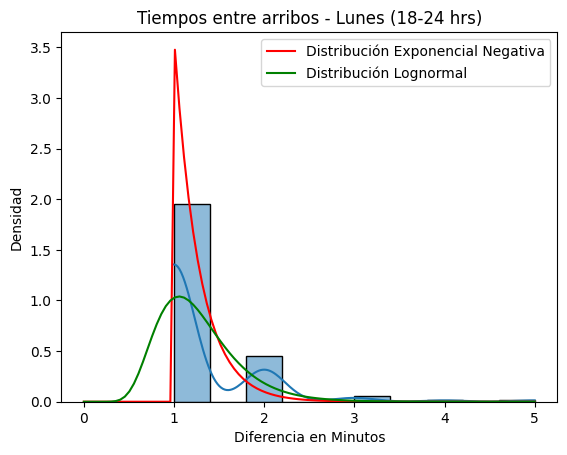

KS Test Statistic (Exponencial): 0.781021897810219
P-Value (Exponencial): 5.280290496697597e-89
Parámetros de la distribución exponencial: loc=1.0, scale=0.27737226277372273
Se rechaza la hipótesis nula: Los datos no siguen una distribución exponencial negativa.
KS Test Statistic (Lognormal): 0.4736711714452183
P-Value (Lognormal): 9.6433342867959e-29
Parámetros de la distribución lognormal: shape=0.34250999291705, loc=0, scale=1.1881655631052483
Se rechaza la hipótesis nula: Los datos no siguen una distribución lognormal.


In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import expon, lognorm, gamma, kstest
import numpy as np

# Filtrar los datos para los lunes entre las 18 y las 24 horas
df_monday = df[(df['Day of Week'] == 'Monday') & (df['Entry Hour'] >= 18) & (df['Entry Hour'] < 24)]

# Convertir la columna 'Entry Time' a formato datetime, considerando solo la hora
df_monday['Entry Time'] = pd.to_datetime(df_monday['Entry Time'], format='%H:%M:%S')

# Ordenar los tiempos
df_monday_sorted = df_monday.sort_values(by='Entry Time')

# Calcular la diferencia en minutos entre cada tiempo
df_monday_sorted['Minutes Difference'] = df_monday_sorted['Entry Time'].diff().dt.total_seconds() / 60

# Eliminar los valores NaN de la columna 'Minutes Difference'
minutes_diff = df_monday_sorted['Minutes Difference'].dropna()

# Filtrar los valores que sean mayores a 50 en la columna 'Minutes Difference'
minutes_diff = minutes_diff[minutes_diff <= 50]

# Eliminar los valores iguales a 0
minutes_diff = minutes_diff[minutes_diff > 0]

# Crear el histograma con la curva de densidad
sns.histplot(minutes_diff, bins=10, kde=True, stat="density", edgecolor='black')

# Ajustar una distribución exponencial a los datos
params_expon = expon.fit(minutes_diff)
x = np.linspace(0, max(minutes_diff), 100)
pdf_expon = expon.pdf(x, *params_expon)

# Graficar la distribución exponencial negativa ajustada
plt.plot(x, pdf_expon, 'r-', label='Distribución Exponencial Negativa')

# Ajustar una distribución lognormal a los datos
params_lognorm = lognorm.fit(minutes_diff, floc=0)
pdf_lognorm = lognorm.pdf(x, *params_lognorm)

# Graficar la distribución lognormal ajustada
plt.plot(x, pdf_lognorm, 'g-', label='Distribución Lognormal')

# Agregar título y etiquetas
plt.title('Tiempos entre arribos - Lunes (18-24 hrs)')
plt.xlabel('Diferencia en Minutos')
plt.ylabel('Densidad')

# Mostrar leyenda
plt.legend()

# Mostrar el histograma y las curvas de densidad
plt.show()

# Realizar el test de Kolmogorov-Smirnov para comparar la distribución observada con la exponencial
ks_stat_expon, p_value_expon = kstest(minutes_diff, 'expon', args=params_expon)

# Realizar el test de Kolmogorov-Smirnov para comparar la distribución observada con la lognormal
ks_stat_lognorm, p_value_lognorm = kstest(minutes_diff, 'lognorm', args=params_lognorm)

# Mostrar los resultados del test de hipótesis para la exponencial
print(f"KS Test Statistic (Exponencial): {ks_stat_expon}")
print(f"P-Value (Exponencial): {p_value_expon}")
print(f"Parámetros de la distribución exponencial: loc={params_expon[0]}, scale={params_expon[1]}")

if p_value_expon > 0.05:
    print("No se puede rechazar la hipótesis nula: Los datos siguen una distribución exponencial negativa.")
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución exponencial negativa.")

# Mostrar los resultados del test de hipótesis para la lognormal
print(f"KS Test Statistic (Lognormal): {ks_stat_lognorm}")
print(f"P-Value (Lognormal): {p_value_lognorm}")
print(f"Parámetros de la distribución lognormal: shape={params_lognorm[0]}, loc={params_lognorm[1]}, scale={params_lognorm[2]}")

if p_value_lognorm > 0.05:
    print("No se puede rechazar la hipótesis nula: Los datos siguen una distribución lognormal.")
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución lognormal.")

##### Domingo

C:\Users\paula\AppData\Local\Temp\ipykernel_29964\53370056.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sunday['Entry Time'] = pd.to_datetime(df_sunday['Entry Time'], format='%H:%M:%S')


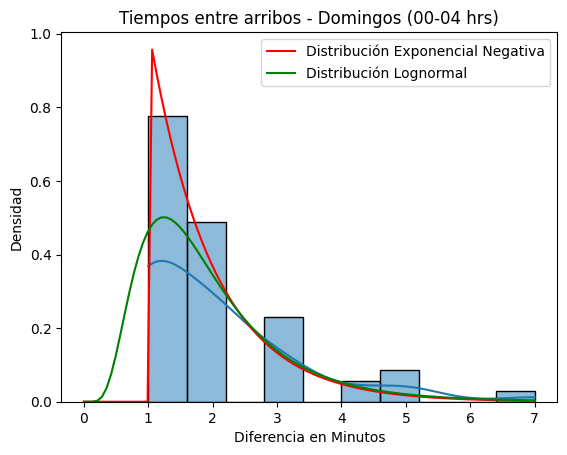

KS Test Statistic (Exponencial): 0.46551724137931033
P-Value (Exponencial): 4.898137298265908e-12
Parámetros de la distribución exponencial: loc=1.0, scale=0.9827586206896552
Se rechaza la hipótesis nula: Los datos no siguen una distribución exponencial negativa.
KS Test Statistic (Lognormal): 0.29271273002938014
P-Value (Lognormal): 6.744078106897036e-05
Parámetros de la distribución lognormal: shape=0.5506038117409506, loc=0, scale=1.6808452226957848
Se rechaza la hipótesis nula: Los datos no siguen una distribución lognormal.


In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import expon, lognorm, kstest
import numpy as np

# Filtrar los datos para los domingos entre las 0 y las 4 horas
df_sunday = df[(df['Day of Week'] == 'Sunday') & (df['Entry Hour'] >= 0) & (df['Entry Hour'] < 4)]

# Convertir la columna 'Entry Time' a formato datetime, considerando solo la hora
df_sunday['Entry Time'] = pd.to_datetime(df_sunday['Entry Time'], format='%H:%M:%S')

# Ordenar los tiempos
df_sunday_sorted = df_sunday.sort_values(by='Entry Time')

# Calcular la diferencia en minutos entre cada tiempo
df_sunday_sorted['Minutes Difference'] = df_sunday_sorted['Entry Time'].diff().dt.total_seconds() / 60

# Eliminar los valores NaN de la columna 'Minutes Difference'
minutes_diff = df_sunday_sorted['Minutes Difference'].dropna()

# Filtrar los valores que sean mayores a 50 en la columna 'Minutes Difference'
minutes_diff = minutes_diff[minutes_diff <= 50]

# Eliminar los valores iguales a 0
minutes_diff = minutes_diff[minutes_diff > 0]

# Crear el histograma con la curva de densidad
sns.histplot(minutes_diff, bins=10, kde=True, stat="density", edgecolor='black')

# Ajustar una distribución exponencial a los datos
params_expon = expon.fit(minutes_diff)
x = np.linspace(0, max(minutes_diff), 100)
pdf_expon = expon.pdf(x, *params_expon)

# Graficar la distribución exponencial negativa ajustada
plt.plot(x, pdf_expon, 'r-', label='Distribución Exponencial Negativa')

# Ajustar una distribución lognormal a los datos
params_lognorm = lognorm.fit(minutes_diff, floc=0)
pdf_lognorm = lognorm.pdf(x, *params_lognorm)

# Graficar la distribución lognormal ajustada
plt.plot(x, pdf_lognorm, 'g-', label='Distribución Lognormal')

# Agregar título y etiquetas
plt.title('Tiempos entre arribos - Domingos (00-04 hrs)')
plt.xlabel('Diferencia en Minutos')
plt.ylabel('Densidad')

# Mostrar leyenda
plt.legend()

# Mostrar el histograma y las curvas de densidad
plt.show()

# Realizar el test de Kolmogorov-Smirnov para comparar la distribución observada con la exponencial
ks_stat_expon, p_value_expon = kstest(minutes_diff, 'expon', args=params_expon)

# Realizar el test de Kolmogorov-Smirnov para comparar la distribución observada con la lognormal
ks_stat_lognorm, p_value_lognorm = kstest(minutes_diff, 'lognorm', args=params_lognorm)

# Mostrar los resultados del test de hipótesis para la exponencial
print(f"KS Test Statistic (Exponencial): {ks_stat_expon}")
print(f"P-Value (Exponencial): {p_value_expon}")
print(f"Parámetros de la distribución exponencial: loc={params_expon[0]}, scale={params_expon[1]}")

if p_value_expon > 0.05:
    print("No se puede rechazar la hipótesis nula: Los datos siguen una distribución exponencial negativa.")
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución exponencial negativa.")

# Mostrar los resultados del test de hipótesis para la lognormal
print(f"KS Test Statistic (Lognormal): {ks_stat_lognorm}")
print(f"P-Value (Lognormal): {p_value_lognorm}")
print(f"Parámetros de la distribución lognormal: shape={params_lognorm[0]}, loc={params_lognorm[1]}, scale={params_lognorm[2]}")

if p_value_lognorm > 0.05:
    print("No se puede rechazar la hipótesis nula: Los datos siguen una distribución lognormal.")
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución lognormal.")


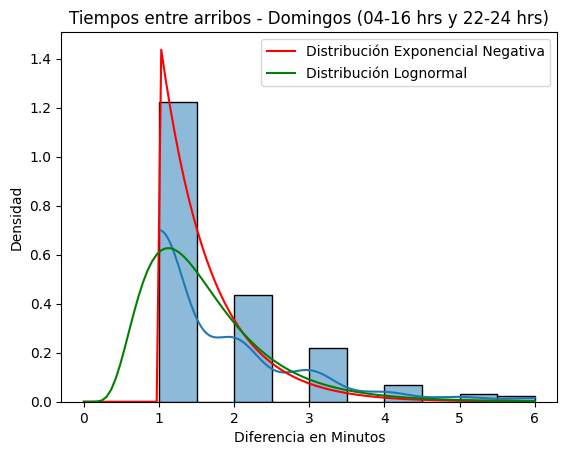

KS Test Statistic (Exponencial): 0.6108786610878661
P-Value (Exponencial): 3.469352043330635e-86
Parámetros de la distribución exponencial: loc=1.0, scale=0.6652719665271967
Se rechaza la hipótesis nula: Los datos no siguen una distribución exponencial negativa.
KS Test Statistic (Lognormal): 0.37900371793084975
P-Value (Lognormal): 2.312509722345263e-31
Parámetros de la distribución lognormal: shape=0.4997428244815878, loc=0, scale=1.4421782371021596
Se rechaza la hipótesis nula: Los datos no siguen una distribución lognormal.


In [105]:
#Domingos entre las 4 y las 16 horas
df_sunday_morning = df[(df['Day of Week'] == 'Sunday') & (df['Entry Hour'] >= 4) & (df['Entry Hour'] < 16)]

# Filtrar los datos para los domingos entre las 22 y las 24 horas
df_sunday_night = df[(df['Day of Week'] == 'Sunday') & (df['Entry Hour'] >= 22) & (df['Entry Hour'] < 24)]

# Unir los dos conjuntos de datos
df_sunday = pd.concat([df_sunday_morning, df_sunday_night])

# Convertir la columna 'Entry Time' a formato datetime, considerando solo la hora
df_sunday['Entry Time'] = pd.to_datetime(df_sunday['Entry Time'], format='%H:%M:%S')

# Ordenar los tiempos
df_sunday_sorted = df_sunday.sort_values(by='Entry Time')

# Calcular la diferencia en minutos entre cada tiempo
df_sunday_sorted['Minutes Difference'] = df_sunday_sorted['Entry Time'].diff().dt.total_seconds() / 60

# Eliminar los valores NaN de la columna 'Minutes Difference'
minutes_diff = df_sunday_sorted['Minutes Difference'].dropna()

# Filtrar los valores que sean mayores a 50 en la columna 'Minutes Difference'
minutes_diff = minutes_diff[minutes_diff <= 50]

# Eliminar los valores iguales a 0
minutes_diff = minutes_diff[minutes_diff > 0]

# Crear el histograma con la curva de densidad
sns.histplot(minutes_diff, bins=10, kde=True, stat="density", edgecolor='black')

# Ajustar una distribución exponencial a los datos
params_expon = expon.fit(minutes_diff)
x = np.linspace(0, max(minutes_diff), 100)
pdf_expon = expon.pdf(x, *params_expon)

# Graficar la distribución exponencial negativa ajustada
plt.plot(x, pdf_expon, 'r-', label='Distribución Exponencial Negativa')

# Ajustar una distribución lognormal a los datos
params_lognorm = lognorm.fit(minutes_diff, floc=0)
pdf_lognorm = lognorm.pdf(x, *params_lognorm)

# Graficar la distribución lognormal ajustada
plt.plot(x, pdf_lognorm, 'g-', label='Distribución Lognormal')

# Agregar título y etiquetas
plt.title('Tiempos entre arribos - Domingos (04-16 hrs y 22-24 hrs)')
plt.xlabel('Diferencia en Minutos')
plt.ylabel('Densidad')

# Mostrar leyenda
plt.legend()

# Mostrar el histograma y las curvas de densidad
plt.show()

# Realizar el test de Kolmogorov-Smirnov para comparar la distribución observada con la exponencial
ks_stat_expon, p_value_expon = kstest(minutes_diff, 'expon', args=params_expon)

# Realizar el test de Kolmogorov-Smirnov para comparar la distribución observada con la lognormal
ks_stat_lognorm, p_value_lognorm = kstest(minutes_diff, 'lognorm', args=params_lognorm)

# Mostrar los resultados del test de hipótesis para la exponencial
print(f"KS Test Statistic (Exponencial): {ks_stat_expon}")
print(f"P-Value (Exponencial): {p_value_expon}")
print(f"Parámetros de la distribución exponencial: loc={params_expon[0]}, scale={params_expon[1]}")

if p_value_expon > 0.05:
    print("No se puede rechazar la hipótesis nula: Los datos siguen una distribución exponencial negativa.")
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución exponencial negativa.")

# Mostrar los resultados del test de hipótesis para la lognormal
print(f"KS Test Statistic (Lognormal): {ks_stat_lognorm}")
print(f"P-Value (Lognormal): {p_value_lognorm}")
print(f"Parámetros de la distribución lognormal: shape={params_lognorm[0]}, loc={params_lognorm[1]}, scale={params_lognorm[2]}")

if p_value_lognorm > 0.05:
    print("No se puede rechazar la hipótesis nula: Los datos siguen una distribución lognormal.")
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución lognormal.")


C:\Users\paula\AppData\Local\Temp\ipykernel_29964\2079177965.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sunday['Entry Time'] = pd.to_datetime(df_sunday['Entry Time'], format='%H:%M:%S')


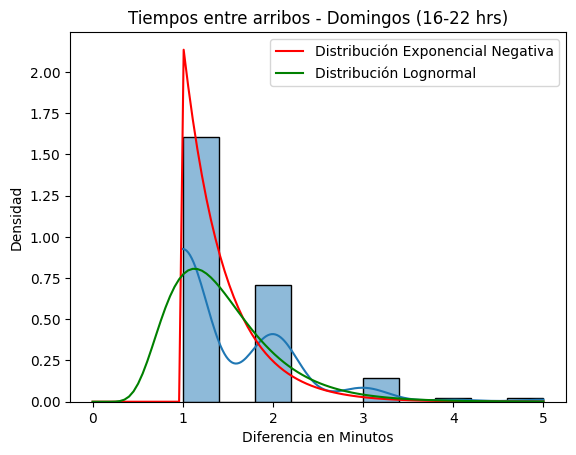

KS Test Statistic (Exponencial): 0.6416666666666667
P-Value (Exponencial): 1.2963869923093222e-48
Parámetros de la distribución exponencial: loc=1.0, scale=0.45833333333333326
Se rechaza la hipótesis nula: Los datos no siguen una distribución exponencial negativa.
KS Test Statistic (Lognormal): 0.4021167665559316
P-Value (Lognormal): 4.9503953913005626e-18
Parámetros de la distribución lognormal: shape=0.4033082096181024, loc=0, scale=1.330349718101712
Se rechaza la hipótesis nula: Los datos no siguen una distribución lognormal.


In [106]:
#Domingos entre las 16 y las 22 horas
df_sunday = df[(df['Day of Week'] == 'Sunday') & (df['Entry Hour'] >= 16) & (df['Entry Hour'] < 22)]

# Convertir la columna 'Entry Time' a formato datetime, considerando solo la hora
df_sunday['Entry Time'] = pd.to_datetime(df_sunday['Entry Time'], format='%H:%M:%S')

# Ordenar los tiempos
df_sunday_sorted = df_sunday.sort_values(by='Entry Time')

# Calcular la diferencia en minutos entre cada tiempo
df_sunday_sorted['Minutes Difference'] = df_sunday_sorted['Entry Time'].diff().dt.total_seconds() / 60

# Eliminar los valores NaN de la columna 'Minutes Difference'
minutes_diff = df_sunday_sorted['Minutes Difference'].dropna()

# Filtrar los valores que sean mayores a 50 en la columna 'Minutes Difference'
minutes_diff = minutes_diff[minutes_diff <= 50]

# Eliminar los valores iguales a 0
minutes_diff = minutes_diff[minutes_diff > 0]

# Crear el histograma con la curva de densidad
sns.histplot(minutes_diff, bins=10, kde=True, stat="density", edgecolor='black')

# Ajustar una distribución exponencial a los datos
params_expon = expon.fit(minutes_diff)
x = np.linspace(0, max(minutes_diff), 100)
pdf_expon = expon.pdf(x, *params_expon)

# Graficar la distribución exponencial negativa ajustada
plt.plot(x, pdf_expon, 'r-', label='Distribución Exponencial Negativa')

# Ajustar una distribución lognormal a los datos
params_lognorm = lognorm.fit(minutes_diff, floc=0)
pdf_lognorm = lognorm.pdf(x, *params_lognorm)

# Graficar la distribución lognormal ajustada
plt.plot(x, pdf_lognorm, 'g-', label='Distribución Lognormal')

# Agregar título y etiquetas
plt.title('Tiempos entre arribos - Domingos (16-22 hrs)')
plt.xlabel('Diferencia en Minutos')
plt.ylabel('Densidad')

# Mostrar leyenda
plt.legend()

# Mostrar el histograma y las curvas de densidad
plt.show()

# Realizar el test de Kolmogorov-Smirnov para comparar la distribución observada con la exponencial
ks_stat_expon, p_value_expon = kstest(minutes_diff, 'expon', args=params_expon)

# Realizar el test de Kolmogorov-Smirnov para comparar la distribución observada con la lognormal
ks_stat_lognorm, p_value_lognorm = kstest(minutes_diff, 'lognorm', args=params_lognorm)

# Mostrar los resultados del test de hipótesis para la exponencial
print(f"KS Test Statistic (Exponencial): {ks_stat_expon}")
print(f"P-Value (Exponencial): {p_value_expon}")
print(f"Parámetros de la distribución exponencial: loc={params_expon[0]}, scale={params_expon[1]}")

if p_value_expon > 0.05:
    print("No se puede rechazar la hipótesis nula: Los datos siguen una distribución exponencial negativa.")
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución exponencial negativa.")

# Mostrar los resultados del test de hipótesis para la lognormal
print(f"KS Test Statistic (Lognormal): {ks_stat_lognorm}")
print(f"P-Value (Lognormal): {p_value_lognorm}")
print(f"Parámetros de la distribución lognormal: shape={params_lognorm[0]}, loc={params_lognorm[1]}, scale={params_lognorm[2]}")

if p_value_lognorm > 0.05:
    print("No se puede rechazar la hipótesis nula: Los datos siguen una distribución lognormal.")
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución lognormal.")


##### Martes, miercoles, jueves y viernes

C:\Users\paula\AppData\Local\Temp\ipykernel_29964\1245411873.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_days['Entry Hour'] = pd.to_datetime(filtered_days['Entry Time'], format='%H:%M:%S', errors='coerce').dt.hour
C:\Users\paula\AppData\Local\Temp\ipykernel_29964\1245411873.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_days['Hour Range'] = pd.cut(filtered_days['Entry Hour'], bins=np.arange(0, 25, 2), right=False, labels=[f'{i}-{i+2}' for i in range(0, 24, 2)])


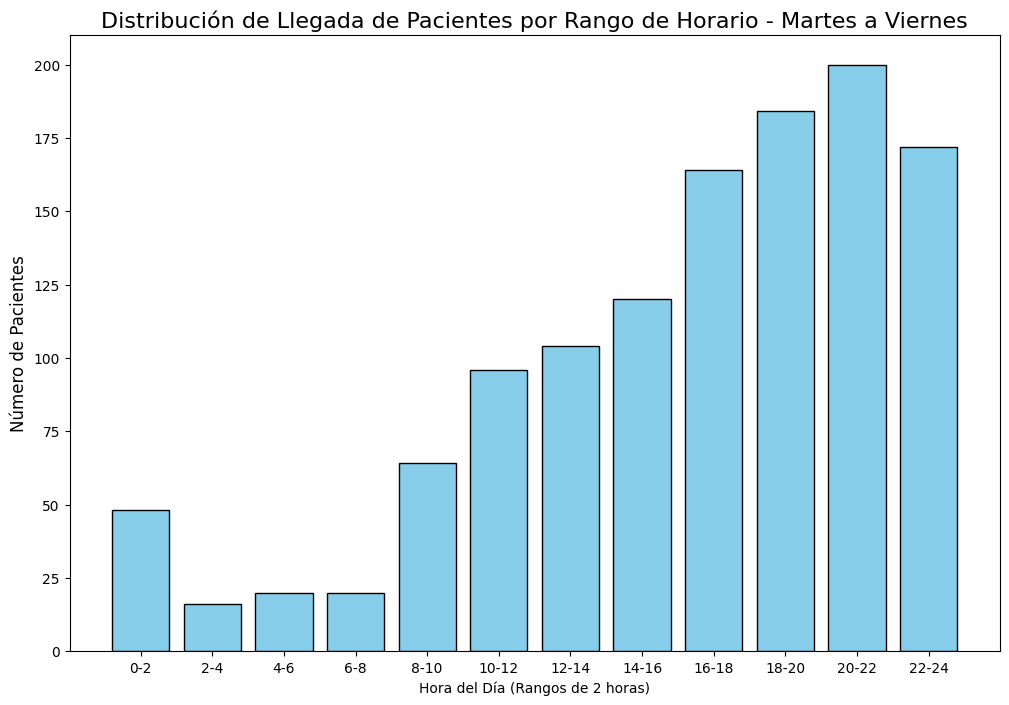

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar los datos para los días martes, miércoles, jueves y viernes
filtered_days = df[df['Day of Week'].isin(['Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

# Asegurarnos de que la columna 'Entry Hour' esté en formato correcto (0-23)
filtered_days['Entry Hour'] = pd.to_datetime(filtered_days['Entry Time'], format='%H:%M:%S', errors='coerce').dt.hour

# Crear un nuevo rango de horas agrupado en intervalos de 2 horas
filtered_days['Hour Range'] = pd.cut(filtered_days['Entry Hour'], bins=np.arange(0, 25, 2), right=False, labels=[f'{i}-{i+2}' for i in range(0, 24, 2)])

# Agrupar los datos por el rango de horas de 2 en 2 y contar el número de pacientes
hourly_counts = filtered_days['Hour Range'].value_counts().sort_index()

# Crear el histograma
plt.figure(figsize=(12, 8))
plt.bar(hourly_counts.index, hourly_counts.values, color='skyblue', edgecolor='black')

# Agregar títulos y etiquetas
plt.title('Distribución de Llegada de Pacientes por Rango de Horario - Martes a Viernes', fontsize=16)
plt.xlabel('Hora del Día (Rangos de 2 horas)', fontsize=10)
plt.ylabel('Número de Pacientes', fontsize=12)

# Mostrar el gráfico
plt.show()


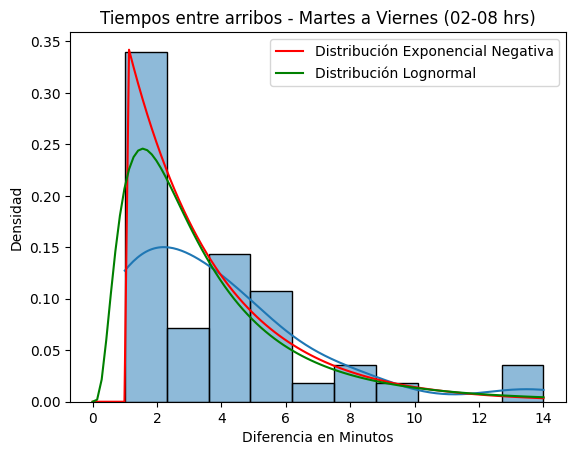

KS Test Statistic (Exponencial): 0.2558139534883721
P-Value (Exponencial): 0.005724463319516038
Parámetros de la distribución exponencial: loc=1.0, scale=2.7906976744186047
Se rechaza la hipótesis nula: Los datos no siguen una distribución exponencial negativa.
KS Test Statistic (Lognormal): 0.16661671008011758
P-Value (Lognormal): 0.16382773899950998
Parámetros de la distribución lognormal: shape=0.7731621227058714, loc=0, scale=2.8305067817978364
No se puede rechazar la hipótesis nula: Los datos siguen una distribución lognormal.


In [122]:
# Filtrar los datos para los días martes, miércoles, jueves y viernes entre las 2 y las 8 horas
df_weekdays = df[df['Day of Week'].isin(['Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
df_weekdays = df_weekdays[(df_weekdays['Entry Hour'] >= 2) & (df_weekdays['Entry Hour'] < 8)]

# Convertir la columna 'Entry Time' a formato datetime, considerando solo la hora
df_weekdays['Entry Time'] = pd.to_datetime(df_weekdays['Entry Time'], format='%H:%M:%S')

# Ordenar los tiempos
df_weekdays_sorted = df_weekdays.sort_values(by='Entry Time')

# Calcular la diferencia en minutos entre cada tiempo
df_weekdays_sorted['Minutes Difference'] = df_weekdays_sorted['Entry Time'].diff().dt.total_seconds() / 60

# Eliminar los valores NaN de la columna 'Minutes Difference'
minutes_diff = df_weekdays_sorted['Minutes Difference'].dropna()

# Filtrar los valores que sean mayores a 50 en la columna 'Minutes Difference'
minutes_diff = minutes_diff[minutes_diff <= 50]

# Eliminar los valores iguales a 0
minutes_diff = minutes_diff[minutes_diff > 0]

# Crear el histograma con la curva de densidad
sns.histplot(minutes_diff, bins=10, kde=True, stat="density", edgecolor='black')

# Ajustar una distribución exponencial a los datos
params_expon = expon.fit(minutes_diff)
x = np.linspace(0, max(minutes_diff), 100)
pdf_expon = expon.pdf(x, *params_expon)

# Graficar la distribución exponencial negativa ajustada
plt.plot(x, pdf_expon, 'r-', label='Distribución Exponencial Negativa')

# Ajustar una distribución lognormal a los datos
params_lognorm = lognorm.fit(minutes_diff, floc=0)
pdf_lognorm = lognorm.pdf(x, *params_lognorm)

# Graficar la distribución lognormal ajustada
plt.plot(x, pdf_lognorm, 'g-', label='Distribución Lognormal')

# Agregar título y etiquetas
plt.title('Tiempos entre arribos - Martes a Viernes (02-08 hrs)')
plt.xlabel('Diferencia en Minutos')
plt.ylabel('Densidad')

# Mostrar leyenda
plt.legend()

# Mostrar el histograma y las curvas de densidad
plt.show()

# Realizar el test de Kolmogorov-Smirnov para comparar la distribución observada con la exponencial
ks_stat_expon, p_value_expon = kstest(minutes_diff, 'expon', args=params_expon)

# Realizar el test de Kolmogorov-Smirnov para comparar la distribución observada con la lognormal
ks_stat_lognorm, p_value_lognorm = kstest(minutes_diff, 'lognorm', args=params_lognorm)

# Mostrar los resultados del test de hipótesis para la exponencial
print(f"KS Test Statistic (Exponencial): {ks_stat_expon}")
print(f"P-Value (Exponencial): {p_value_expon}")
print(f"Parámetros de la distribución exponencial: loc={params_expon[0]}, scale={params_expon[1]}")

if p_value_expon > 0.05:
    print("No se puede rechazar la hipótesis nula: Los datos siguen una distribución exponencial negativa.")
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución exponencial negativa.")

# Mostrar los resultados del test de hipótesis para la lognormal
print(f"KS Test Statistic (Lognormal): {ks_stat_lognorm}")
print(f"P-Value (Lognormal): {p_value_lognorm}")
print(f"Parámetros de la distribución lognormal: shape={params_lognorm[0]}, loc={params_lognorm[1]}, scale={params_lognorm[2]}")

if p_value_lognorm > 0.05:
    print("No se puede rechazar la hipótesis nula: Los datos siguen una distribución lognormal.")
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución lognormal.")

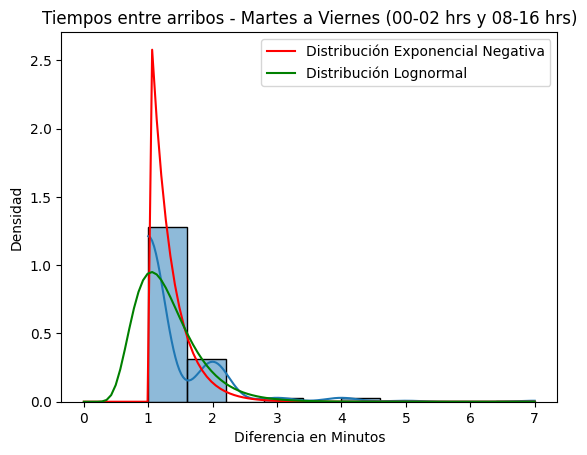

KS Test Statistic (Exponencial): 0.7692307692307693
P-Value (Exponencial): 1.0651084218468648e-137
Parámetros de la distribución exponencial: loc=1.0, scale=0.3212669683257918
Se rechaza la hipótesis nula: Los datos no siguen una distribución exponencial negativa.
KS Test Statistic (Lognormal): 0.46397471990283534
P-Value (Lognormal): 4.3285676810628733e-44
Parámetros de la distribución lognormal: shape=0.37235477150173185, loc=0, scale=1.2088338681888022
Se rechaza la hipótesis nula: Los datos no siguen una distribución lognormal.


In [124]:
# Filtrar los datos para los días martes, miércoles, jueves y viernes entre las 0-2 y 8-16 horas
df_weekdays = df[df['Day of Week'].isin(['Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
df_weekdays = df_weekdays[((df_weekdays['Entry Hour'] >= 0) & (df_weekdays['Entry Hour'] < 2)) |
                          ((df_weekdays['Entry Hour'] >= 8) & (df_weekdays['Entry Hour'] < 16))]

# Convertir la columna 'Entry Time' a formato datetime, considerando solo la hora
df_weekdays['Entry Time'] = pd.to_datetime(df_weekdays['Entry Time'], format='%H:%M:%S')

# Ordenar los tiempos
df_weekdays_sorted = df_weekdays.sort_values(by='Entry Time')

# Calcular la diferencia en minutos entre cada tiempo
df_weekdays_sorted['Minutes Difference'] = df_weekdays_sorted['Entry Time'].diff().dt.total_seconds() / 60

# Eliminar los valores NaN de la columna 'Minutes Difference'
minutes_diff = df_weekdays_sorted['Minutes Difference'].dropna()

# Filtrar los valores que sean mayores a 50 en la columna 'Minutes Difference'
minutes_diff = minutes_diff[minutes_diff <= 50]

# Eliminar los valores iguales a 0
minutes_diff = minutes_diff[minutes_diff > 0]

# Crear el histograma con la curva de densidad
sns.histplot(minutes_diff, bins=10, kde=True, stat="density", edgecolor='black')

# Ajustar una distribución exponencial a los datos
params_expon = expon.fit(minutes_diff)
x = np.linspace(0, max(minutes_diff), 100)
pdf_expon = expon.pdf(x, *params_expon)

# Graficar la distribución exponencial negativa ajustada
plt.plot(x, pdf_expon, 'r-', label='Distribución Exponencial Negativa')

# Ajustar una distribución lognormal a los datos
params_lognorm = lognorm.fit(minutes_diff, floc=0)
pdf_lognorm = lognorm.pdf(x, *params_lognorm)

# Graficar la distribución lognormal ajustada
plt.plot(x, pdf_lognorm, 'g-', label='Distribución Lognormal')

# Agregar título y etiquetas
plt.title('Tiempos entre arribos - Martes a Viernes (00-02 hrs y 08-16 hrs)')
plt.xlabel('Diferencia en Minutos')
plt.ylabel('Densidad')

# Mostrar leyenda
plt.legend()

# Mostrar el histograma y las curvas de densidad
plt.show()

# Realizar el test de Kolmogorov-Smirnov para comparar la distribución observada con la exponencial
ks_stat_expon, p_value_expon = kstest(minutes_diff, 'expon', args=params_expon)

# Realizar el test de Kolmogorov-Smirnov para comparar la distribución observada con la lognormal
ks_stat_lognorm, p_value_lognorm = kstest(minutes_diff, 'lognorm', args=params_lognorm)

# Mostrar los resultados del test de hipótesis para la exponencial
print(f"KS Test Statistic (Exponencial): {ks_stat_expon}")
print(f"P-Value (Exponencial): {p_value_expon}")
print(f"Parámetros de la distribución exponencial: loc={params_expon[0]}, scale={params_expon[1]}")

if p_value_expon > 0.05:
    print("No se puede rechazar la hipótesis nula: Los datos siguen una distribución exponencial negativa.")
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución exponencial negativa.")

# Mostrar los resultados del test de hipótesis para la lognormal
print(f"KS Test Statistic (Lognormal): {ks_stat_lognorm}")
print(f"P-Value (Lognormal): {p_value_lognorm}")
print(f"Parámetros de la distribución lognormal: shape={params_lognorm[0]}, loc={params_lognorm[1]}, scale={params_lognorm[2]}")

if p_value_lognorm > 0.05:
    print("No se puede rechazar la hipótesis nula: Los datos siguen una distribución lognormal.")
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución lognormal.")

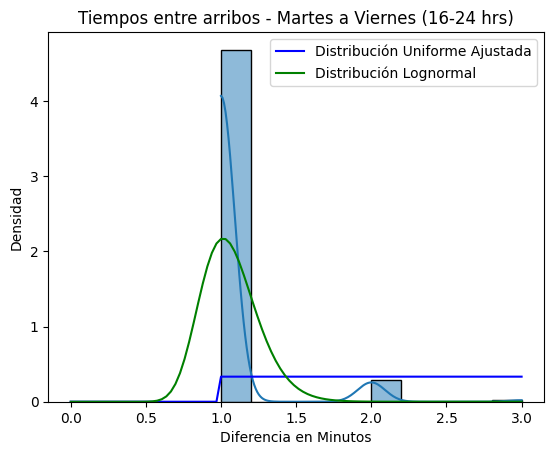

KS Test Statistic (Uniforme): 0.9363636363636364
P-Value (Uniforme): 1.3071751991029418e-263
Parámetros de la distribución uniforme ajustada: loc=1.0, scale=3.0
Se rechaza la hipótesis nula: Los datos no siguen una distribución uniforme.
KS Test Statistic (Lognormal): 0.5380947644864651
P-Value (Lognormal): 4.098087249355317e-60
Parámetros de la distribución lognormal: shape=0.1782271442002357, loc=0, scale=1.0470245601501613
Se rechaza la hipótesis nula: Los datos no siguen una distribución lognormal.


In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, lognorm, kstest
import numpy as np

# Filtrar los datos para los días martes, miércoles, jueves y viernes entre las 16 y las 24 horas
df_weekdays = df[df['Day of Week'].isin(['Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
df_weekdays = df_weekdays[(df_weekdays['Entry Hour'] >= 16) & (df_weekdays['Entry Hour'] < 24)]

# Convertir la columna 'Entry Time' a formato datetime, considerando solo la hora
df_weekdays['Entry Time'] = pd.to_datetime(df_weekdays['Entry Time'], format='%H:%M:%S')

# Ordenar los tiempos
df_weekdays_sorted = df_weekdays.sort_values(by='Entry Time')

# Calcular la diferencia en minutos entre cada tiempo
df_weekdays_sorted['Minutes Difference'] = df_weekdays_sorted['Entry Time'].diff().dt.total_seconds() / 60

# Eliminar los valores NaN de la columna 'Minutes Difference'
minutes_diff = df_weekdays_sorted['Minutes Difference'].dropna()

# Filtrar los valores que sean mayores a 50 en la columna 'Minutes Difference'
minutes_diff = minutes_diff[minutes_diff <= 50]

# Eliminar los valores iguales a 0
minutes_diff = minutes_diff[minutes_diff > 0]

# Crear el histograma con la curva de densidad
sns.histplot(minutes_diff, bins=10, kde=True, stat="density", edgecolor='black')

# Ajustar una distribución uniforme a los datos
params_uniform = uniform.fit(minutes_diff)
params_uniform = (params_uniform[0], params_uniform[1] * 1.5)  # Aumentar el rango de la distribución uniforme
x = np.linspace(0, max(minutes_diff), 100)
pdf_uniform = uniform.pdf(x, *params_uniform)

# Graficar la distribución uniforme ajustada
plt.plot(x, pdf_uniform, 'b-', label='Distribución Uniforme Ajustada')

# Ajustar una distribución lognormal a los datos
params_lognorm = lognorm.fit(minutes_diff, floc=0)
pdf_lognorm = lognorm.pdf(x, *params_lognorm)

# Graficar la distribución lognormal ajustada
plt.plot(x, pdf_lognorm, 'g-', label='Distribución Lognormal')

# Agregar título y etiquetas
plt.title('Tiempos entre arribos - Martes a Viernes (16-24 hrs)')
plt.xlabel('Diferencia en Minutos')
plt.ylabel('Densidad')

# Mostrar leyenda
plt.legend()

# Mostrar el histograma y las curvas de densidad
plt.show()

# Realizar el test de Kolmogorov-Smirnov para comparar la distribución observada con la uniforme
ks_stat_uniform, p_value_uniform = kstest(minutes_diff, 'uniform', args=params_uniform)

# Realizar el test de Kolmogorov-Smirnov para comparar la distribución observada con la lognormal
ks_stat_lognorm, p_value_lognorm = kstest(minutes_diff, 'lognorm', args=params_lognorm)

# Mostrar los resultados del test de hipótesis para la distribución uniforme
print(f"KS Test Statistic (Uniforme): {ks_stat_uniform}")
print(f"P-Value (Uniforme): {p_value_uniform}")
print(f"Parámetros de la distribución uniforme ajustada: loc={params_uniform[0]}, scale={params_uniform[1]}")

if p_value_uniform > 0.05:
    print("No se puede rechazar la hipótesis nula: Los datos siguen una distribución uniforme.")
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución uniforme.")

# Mostrar los resultados del test de hipótesis para la lognormal
print(f"KS Test Statistic (Lognormal): {ks_stat_lognorm}")
print(f"P-Value (Lognormal): {p_value_lognorm}")
print(f"Parámetros de la distribución lognormal: shape={params_lognorm[0]}, loc={params_lognorm[1]}, scale={params_lognorm[2]}")

if p_value_lognorm > 0.05:
    print("No se puede rechazar la hipótesis nula: Los datos siguen una distribución lognormal.")
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución lognormal.")


#### Agrego la columna de Tipo de atención (emergencia/urgencia/consultas varias)
###### Le puse un porcentage del 0.6%, 10.8% y 88.6%
###### Le dije que el 90% de las consultas varias son entre las 10am y 00hrs

In [136]:
import pandas as pd
import numpy as np

# Definir el número total de filas
n = len(df)

# Definir el porcentaje deseado para cada tipo de consulta
porcentaje_consulta = 0.886  # 88,6% de consultas
porcentaje_urgencia = 0.10 + (0.9 - porcentaje_consulta)  # Aumentar urgencia en lo que bajó consulta
porcentaje_emergencia = 0.006  # Menos del 1% de emergencias

# Definir el número exacto de cada tipo de consulta
n_consulta = int(n * porcentaje_consulta)
n_urgencia = int(n * porcentaje_urgencia)
n_emergencia = int(n * porcentaje_emergencia)

# Asignar los tipos de consulta
df_final = df.copy()
df_final['Tipo consulta'] = ["Consulta"] * n

# Reemplazar algunos registros con "Urgencia" y "Emergencia"
df_final.loc[df_final.sample(n=n_urgencia, random_state=1).index, 'Tipo consulta'] = "Urgencia"
df_final.loc[df_final.sample(n=n_emergencia, random_state=1).index, 'Tipo consulta'] = "Emergencia"

# Mezclar los valores para aleatorizarlos
df_final = df_final.sample(frac=1, random_state=1).reset_index(drop=True)

# Verificar las cantidades finales
cantidad_consultas = df_final['Tipo consulta'].value_counts()
porcentaje_consultas = df_final['Tipo consulta'].value_counts(normalize=True) * 100

# Mostrar la cantidad de consultas y sus porcentajes
print("Cantidad de consultas por tipo:")
print(cantidad_consultas)
print("\nPorcentaje de consultas por tipo:")
print(porcentaje_consultas)


Cantidad de consultas por tipo:
Tipo consulta
Consulta      2556
Urgencia       311
Emergencia      17
Name: count, dtype: int64

Porcentaje de consultas por tipo:
Tipo consulta
Consulta      88.626907
Urgencia      10.783634
Emergencia     0.589459
Name: proportion, dtype: float64


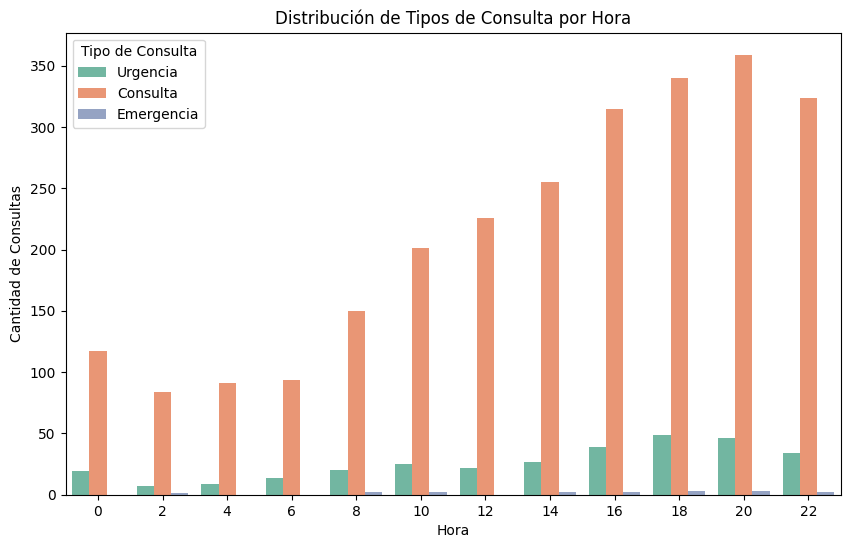

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el gráfico de barras apiladas
plt.figure(figsize=(10, 6))
sns.countplot(data=df_final, x='Entry Hour', hue='Tipo consulta', palette='Set2')
plt.title('Distribución de Tipos de Consulta por Hora')
plt.xlabel('Hora')
plt.ylabel('Cantidad de Consultas')
plt.legend(title='Tipo de Consulta')
plt.show()

### Especialidad a la que se mandan

In [138]:
# Asegúrate de que las columnas 'Entry Date' y 'Entry Time' estén en el formato correcto
df_final['Entry Date'] = pd.to_datetime(df_final['Entry Date'], format='%Y-%m-%d')
df_final['Entry Time'] = pd.to_datetime(df_final['Entry Time'], format='%H:%M:%S').dt.time

# Combina 'Entry Date' y 'Entry Time' en una sola columna de tipo datetime para ordenarlas cronológicamente
df_final['DateTime'] = pd.to_datetime(df_final['Entry Date'].astype(str) + ' ' + df_final['Entry Time'].astype(str))

# Ordenar el DataFrame por la nueva columna 'DateTime'
df_final = df_final.sort_values(by='DateTime').reset_index(drop=True)

# Opcional: eliminar la columna 'DateTime' si no es necesaria
df_final = df_final.drop(columns=['DateTime'])

print(df_final)

      Patient ID Entry Date Entry Time Day of Week  Entry Hour Hour Range  \
0           2599 2024-07-01   00:04:00      Monday           0        0-1   
1           2177 2024-07-01   00:10:00      Monday           0        0-1   
2           8835 2024-07-01   00:11:00      Monday           0        0-1   
3           7884 2024-07-01   00:25:00      Monday           0        0-1   
4           3586 2024-07-01   00:36:00      Monday           0        0-1   
...          ...        ...        ...         ...         ...        ...   
2879        7751 2024-07-28   22:37:00      Sunday          22      22-23   
2880        3117 2024-07-28   22:37:00      Sunday          22      22-23   
2881        4659 2024-07-28   22:40:00      Sunday          22      22-23   
2882        4723 2024-07-28   22:55:00      Sunday          22      22-23   
2883        2942 2024-07-28   22:56:00      Sunday          22      22-23   

     Tipo consulta  
0         Consulta  
1         Consulta  
2         Co

In [142]:
import numpy as np

# Definir las probabilidades para cada especialidad
especialidades = ['Clinica', 'Pediatría', 'Ginecología', 'Traumatología']
probabilidades = [64.58, 22.53, 8.75, 4.14]

# Convertir las probabilidades a proporciones
probabilidades = [p / 100 for p in probabilidades]

# Función para asignar la especialidad basada en el tipo de consulta
def asignar_especialidad(tipo_consulta):
    if tipo_consulta == 'Emergencia':
        return 'NA'
    else:
        return np.random.choice(especialidades, p=probabilidades)

# Aplicar la función para crear la nueva columna 'Especialidad'
df_final['Especialidad'] = df_final['Tipo consulta'].apply(asignar_especialidad)

# Confirmar las proporciones generadas
proporciones_generadas = df_final[df_final['Especialidad'] != 'NA']['Especialidad'].value_counts(normalize=True) * 100

# Contar el total de pacientes atendidos en cada área, incluyendo Emergencias
totales_pacientes = df_final['Especialidad'].value_counts()

# Mostrar las proporciones generadas
print("Proporciones generadas:")
print(proporciones_generadas)

# Mostrar el total de pacientes atendidos en cada área
print("\nTotales de pacientes atendidos en cada área:")
print(totales_pacientes)

# Mostrar la tabla resultante
print("\nTabla completa con la nueva columna 'Especialidad':")
print(df_final)


Proporciones generadas:
Especialidad
Clinica          65.120335
Pediatría        22.183467
Ginecología       8.510638
Traumatología     4.185560
Name: proportion, dtype: float64

Totales de pacientes atendidos en cada área:
Especialidad
Clinica          1867
Pediatría         636
Ginecología       244
Traumatología     120
NA                 17
Name: count, dtype: int64

Tabla completa con la nueva columna 'Especialidad':
      Patient ID Entry Date Entry Time Day of Week  Entry Hour Hour Range  \
0           2599 2024-07-01   00:04:00      Monday           0        0-1   
1           2177 2024-07-01   00:10:00      Monday           0        0-1   
2           8835 2024-07-01   00:11:00      Monday           0        0-1   
3           7884 2024-07-01   00:25:00      Monday           0        0-1   
4           3586 2024-07-01   00:36:00      Monday           0        0-1   
...          ...        ...        ...         ...         ...        ...   
2879        7751 2024-07-28   22:37